# Predicting Iowa House Sales Price (Capstone - I)

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
#import test train data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#defining a columns test in test train to track which rows are test and train
train['test'] = 0
test['test'] = 1


#creating a unified df for test train
df = pd.concat([train, test], axis=0)

pd.set_option('display.max_columns', None)
df.shape

(2919, 82)

#### Replacing spaces from column names in df

In [3]:
df.columns = df.columns.str.replace(" ","_")

# A. Imputing Missing Values 

In [4]:
#checking columns with null values
(df.isnull().sum()[df.isnull().sum()>0]/len(df) *100).sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
BsmtUnfSF        0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
TotalBsmtSF      0.034258
GarageCars       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
SaleType         0.034258
GarageArea       0.034258
dtype: float64

Missing values for 'FireplaceQu','PoolQC','Fence','MiscFeature' means these features are not present in the data. (Source: data description)

In [5]:
df[['FireplaceQu','PoolQC','Fence','MiscFeature','Alley']] = df[['FireplaceQu','PoolQC','Fence','MiscFeature','Alley']].fillna('None')

GarageYrBlt: This should be most likely the either the year of construction or the year of remodel

We can check the overlap between YearBuilt and GarageYrBlt

In [6]:
print("YearBuilt = GarageYrBlt: " + str(sum(df['YearBuilt'] == df['GarageYrBlt'])))
print("YearRemodel = GarageYrBlt: " + str(sum(df['YearRemodAdd'] == df['GarageYrBlt'])))
print("YearBuilt = YearRemodel = GarageYrBlt: " + str(sum((df['YearBuilt'] == df['GarageYrBlt']) & (df['YearRemodAdd'] == df['YearBuilt']))))

YearBuilt = GarageYrBlt: 2216
YearRemodel = GarageYrBlt: 1470
YearBuilt = YearRemodel = GarageYrBlt: 1373


So, from the above analysis we can conclude that most of the garages were built in the same year as the year of construction

In [7]:
df[df['GarageYrBlt'].isnull()].head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
39,1152,0,0,None,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,None,None,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,None,0,6,Edwards,0,5,4,N,0,None,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008,0
48,736,716,0,None,2,2fmCon,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,736.0,Y,Norm,Norm,SBrkr,102,TA,TA,MetalSd,MetalSd,None,None,0,BrkTil,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1452,0,GasA,Gd,2Story,49,3,TA,Lvl,Gtl,4456,Inside,33.0,Reg,0,190,RM,0.0,None,None,0,6,OldTown,0,5,4,N,0,None,CompShg,Gable,Partial,113000.0,New,0,Pave,8,736.0,AllPub,0,1920,2008,2009,0
78,1768,0,0,None,4,Duplex,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1768.0,N,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,None,None,0,CBlock,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1768,0,GasA,TA,1Story,79,2,TA,Lvl,Gtl,10778,Inside,72.0,Reg,0,90,RL,0.0,None,None,0,4,Sawyer,0,5,4,Y,0,None,CompShg,Hip,Normal,136500.0,WD,0,Pave,8,1768.0,AllPub,0,1968,1968,2010,0
88,1013,0,0,None,2,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1013.0,N,Feedr,Feedr,SBrkr,156,Fa,Fa,Plywood,Plywood,MnPrv,None,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1526,0,GasA,TA,1.5Fin,89,1,Fa,Lvl,Gtl,8470,Corner,105.0,IR1,513,50,C (all),0.0,None,None,0,10,IDOTRR,0,2,3,N,0,None,CompShg,Hip,Abnorml,85000.0,ConLD,0,Pave,6,1013.0,AllPub,0,1915,1982,2009,0
89,990,0,0,None,3,1Fam,TA,No,588.0,0.0,GLQ,Unf,1.0,0.0,Gd,402.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,None,None,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,990,0,GasA,Ex,1Story,90,1,TA,Lvl,Gtl,8070,Inside,60.0,Reg,0,20,RL,0.0,None,None,0,8,CollgCr,0,5,4,Y,0,None,CompShg,Gable,Normal,123600.0,WD,0,Pave,5,990.0,AllPub,0,1994,1995,2007,0
99,1225,0,0,None,3,1Fam,TA,No,569.0,0.0,ALQ,Unf,1.0,0.0,TA,381.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,None,None,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1225,1,GasA,Fa,1Story,100,1,TA,Lvl,Gtl,9320,Inside,77.0,IR1,0,20,RL,0.0,None,Shed,400,1,NAmes,0,5,4,Y,0,None,CompShg,Gable,Normal,128950.0,WD,0,Pave,6,950.0,AllPub,352,1959,1959,2010,0
108,997,520,0,None,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,793.0,N,Artery,Norm,FuseF,144,TA,TA,CemntBd,CmentBd,None,None,0,CBlock,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1517,0,GasW,TA,1.5Fin,109,1,Fa,Lvl,Gtl,8500,Corner,85.0,Reg,0,50,RM,0.0,None,None,0,8,IDOTRR,0,7,5,N,0,None,CompShg,Gable,Normal,115000.0,WD,0,Pave,7,793.0,AllPub,0,1919,2005,2007,0
125,520,0,0,None,2,2fmCon,TA,Av,490.0,0.0,GLQ,Unf,1.0,0.0,TA,30.0,N,Norm,Norm,SBrkr,0,Fa,TA,Wd Sdng,Wd Sdng,None,None,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,754,0,GasA,Gd,1.5Fin,126,1,TA,Lvl,Gtl,6780,Inside,60.0,Reg,234,190,RM,0.0,None,None,0,6,IDOTRR,0,8,6,N,0,None,CompShg,Gable,Normal,84500.0,WD,0,Pave,5,520.0,AllPub,53,1935,1982,2006,0
127,840,0,0,None,3,1Fam,TA,No,116.0,0.0,LwQ,Unf,0.0,0.0,TA,556.0,Y,Feedr,Norm,SBrkr,0,Gd,TA,WdShing,Wd Sdng,None,TA,1,BrkTil,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,840,0,GasA,Ex,1.5Unf,128,1,TA,Bnk,Gtl,4388,Inside,55.0,IR1,0,45,RM,0.0,None,None,0,6,OldTown,0,7,5,N,0,None,CompShg,Gable,Normal,87000.0,WD,0,Pave,5,672.0,AllPub,0,1930,1950,2007,0
140,864,0,0,None,3,1Fam,TA,No,432.0,0.

Looking at the data of the rows with missing GarageYrBlt, we can also conclude that there are apprently no garages for these houese. But what if PavedDrive variable is Y, does that mean that there is a garage in the house (as there is paved drive way) and the garage data is missing?

Data description tells us that NA means no garage. So we will replace missing GarageYrBlt with the construction year

In [8]:
df['GarageYrBlt'][df['GarageYrBlt'].isnull()] = df['YearBuilt'][df['GarageYrBlt'].isnull()]

#### LotFrontage

Replacing LotFrontage with the mean of the neighbourhood, as each neighborhood is likely to have similar LotFrontage

In [9]:
for i in df['Neighborhood'].unique():
    df['LotFrontage'][np.logical_and(df['LotFrontage'].isnull(),df['Neighborhood'] == i) ] = float(df.groupby('Neighborhood')['LotFrontage'].mean().values[df.groupby('Neighborhood')['LotFrontage'].mean().index == i])

##### MasVnrArea, MasVnrType

MasVnrArea NaN means there is no masonry done and should be None
If MasVnrArea = 0, then MasVnrType is None, so we will impute the missing values for these 2 variables as zero and None

In [10]:
#replacing NaN with None
df['MasVnrArea'][df['MasVnrArea'].isnull()] = 0
df['MasVnrType'][(df['MasVnrType'].isnull()) | (df['MasVnrType'] == None)] = 'No Veneer'

In [11]:
# df.isnull().sum()[df.isnull().sum()>0]

##### BsmtCond, BsmtExposure
From documentation we know that NA for BsmtCond and BsmtExposure means 'No Basement'

In [12]:
df[['BsmtCond','BsmtExposure']] = df[['BsmtCond','BsmtExposure']].fillna('No Basement')

##### 

In [13]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [14]:
df[df['Utilities'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
455,810,0,0,None,1,1Fam,No Basement,No Basement,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,None,None,0,CBlock,1,Min1,280.0,1.0,TA,Unf,TA,Detchd,1975.0,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,109.000000,Reg,0,30,NaN,0.0,None,None,0,3,IDOTRR,24,4,2,N,0,None,CompShg,Gable,Normal,NaN,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950,2009,1
485,1474,0,0,None,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1632.0,Y,Feedr,Norm,FuseA,144,TA,TA,BrkFace,BrkFace,None,Gd,2,CBlock,1,Min2,495.0,2.0,TA,Unf,TA,Attchd,1952.0,1474,0,GasA,TA,1Story,1946,1,TA,Bnk,Gtl,31220,FR2,74.207207,IR1,0,20,RL,0.0,None,Shed,750,5,Gilbert,0,2,6,Y,0,None,CompShg,Hip,Normal,NaN,WD,0,Pave,7,1632.0,NaN,0,1952,1952,2008,1


##### BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF. TotalBsmtSF

BsmtFinSF1 and BsmtFinSF2 are missing, mostly implying that there is no basement and hence 0. Same holds true for BsmtFinType1 BsmtFinType2. BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF, TotalBsmtSF

In [15]:
df[['BsmtFinSF1','BsmtFinSF2']] = df[['BsmtFinSF1','BsmtFinSF2']].fillna(0)

In [16]:
df[['BsmtFinType1','BsmtFinType2']] = df[['BsmtFinType1','BsmtFinType2']].fillna('No Basement')

In [17]:
df[['BsmtFullBath','BsmtHalfBath']] = df[['BsmtFullBath','BsmtHalfBath']].fillna(0)

In [18]:
df[['BsmtQual']] = df[['BsmtQual']].fillna('No Basement')

In [19]:
df[['BsmtUnfSF', 'TotalBsmtSF']] = df[['BsmtUnfSF', 'TotalBsmtSF']].fillna(0)

##### Electrical
Let's replace electrical with most frequent electrical value

In [20]:
df[['Electrical']] = df[['Electrical']].fillna(df['Electrical'].mode()[0])

##### Exterior1st, Exterior2nd
For Exterior1st and Exterior2nd, let's impute with mode as the house needs to have exterior covering

In [21]:
df[['Exterior1st']] = df[['Exterior1st']].fillna(df['Exterior1st'].mode()[0])
df[['Exterior2nd']] = df[['Exterior2nd']].fillna(df['Exterior2nd'].mode()[0])

##### Functional
For Functional again let's take the mode which typical functionality

In [22]:
df[['Functional']] = df[['Functional']].fillna(df['Functional'].mode()[0])

##### GarageArea, GarageCars

Missing garage area most probably means there is no garage, also for the row with missing agarage area, all other garage parameters are missing, hence missing garage area = 0. Also holds true for GarageCars

In [23]:
df[['GarageArea', 'GarageCars']] = df[['GarageArea', 'GarageCars']].fillna(0)

##### GarageCond
For GarageCond, we observe that there is a house where GarageArea > 0 but other Garage parametrs are missing. We can impute the other missing garage parameters with their modes

In [24]:
df[(df['GarageCond'].isnull()) & df['GarageArea'] <= 0]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.000000,Reg,0,60,RL,196.0,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,0
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.000000,Reg,0,20,RL,0.0,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,0
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.000000,IR1,0,60,RL,162.0,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,0
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.000000,IR1,0,70,RL,0.0,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,0
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.000000,IR1,0,60,RL,350.0,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,0
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,GLQ,Unf,1.0,0.0,Gd,64.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,None,0,Wood,1,Typ,480.0,2.0,TA,Unf,TA,Attchd,1993.0,1362,1,GasA,Ex,1.5Fin,6,1,TA,Lvl,Gtl,14115,Inside,85.000000,IR1,0,50,RL,0.0,None,Shed,700,10,Mitchel,30,5,5,Y,0,None,CompShg,Gable,Normal,143000.0,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009,0
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,GLQ,Unf,1.0,0.0,Ex,317.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,636.0,2.0,TA,RFn,TA,Attchd,2004.0,1694,0,GasA,Ex,1Story,7,1,Gd,Lvl,Gtl,10084,Inside,75.000000,Reg,0,20,RL,186.0,Stone,None,0,8,Somerst,57,5,8,Y,0,None,CompShg,Gable,Normal,307000.0,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007,0
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,None,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,Ex,2Story,8,1,TA,Lvl,Gtl,10382,Corner,81.517647,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,None,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009,0
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,952.0,Y,Artery,Norm,FuseF,205,TA,TA,BrkFace,Wd Shng,None,TA,2,BrkTil,2,Min1,468.0,2.0,TA,Unf,Fa,Detchd,1931.0,1774,0,GasA,Gd,1.5Fin,9,2,TA,Lvl,Gtl,6120,Inside,51.000000,Reg,0,50,RM,0.0,None,None,0,4,OldTown,0,5,7,Y,0,None,Com

In [25]:
df['GarageCond'][(df['GarageCond'].isnull()) & (df['GarageArea'] > 0)] = df['GarageCond'].mode()[0]
df['GarageFinish'][(df['GarageFinish'].isnull()) & (df['GarageArea'] > 0)] = df['GarageFinish'].mode()[0]
df['GarageQual'][(df['GarageQual'].isnull()) & (df['GarageArea'] > 0)] = df['GarageQual'].mode()[0]

rest of the garage parametes have missing garages, lets impute all these garage parameters with 'No Garage'. But we see that there is a house where GarageType is provided but other Garage parameters are missing, which probably implies that the GarageCond is misleading, hence we will alter is the 'No Garage'

In [26]:
df[(df['GarageCond'].isnull()) & (df['GarageType'].notnull())]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
1116,942,886,0,None,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,None,0,BrkTil,2,Typ,0.0,0.0,NaN,NaN,NaN,Detchd,1923.0,1828,0,GasA,Ex,2Story,2577,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,None,0,3,IDOTRR,0,6,5,Y,0,None,CompShg,Gable,Alloca,NaN,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007,1


In [27]:
df['GarageType'][(df['GarageCond'].isnull()) & (df['GarageType'].notnull())] = 'No Garage'

In [28]:
df[['GarageType','GarageFinish','GarageQual','GarageCond']] = df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage)')

##### KitchenQual, MSZoning, SaleType

For KitchenQual, SaleType, MSZoning let's take the mode

In [29]:
df[['KitchenQual']] = df[['KitchenQual']].fillna(df['KitchenQual'].mode()[0])
df[['SaleType']] = df[['SaleType']].fillna(df['SaleType'].mode()[0])
df[['MSZoning']] = df[['MSZoning']].fillna(df['MSZoning'].mode()[0])

##### Utilities

For Utilities, all but 1 house is AllPub, so we will alter the one which is not AllPub or the ones with missing data as AllPub

In [30]:
df['Utilities'][df['Utilities'].isnull() | (df['Utilities'] != df['Utilities'].mode()[0])] = df['Utilities'].mode()[0]

##### Functional

Replacing with mode

In [31]:
df[['Functional']] = df[['Functional']].fillna(df['Functional'].mode()[0])

In [32]:
df.isnull().sum()[df.isnull().sum() > 0]

SalePrice    1459
dtype: int64

### We should not have any missing values now except for SalePrice
#### We will now break the df into train and test again

In [33]:
# train = df[df['test'] ==0]
# test = df[df['test'] ==1]

In [34]:
# test.shape, train.shape

In [35]:
# test = test.drop(['SalePrice', 'test'], axis =1)
# train = train.drop(['test'], axis =1)

In [36]:
test.to_csv('imputed_test.csv',index=False )
train.to_csv('imputed_train.csv', index=False)

All missing values have been imputed in numerical columns. Ideally I should have removed the outliers first and then imputed, as outliers will impact the mean

In [37]:
df['MSSubClass'] = df['MSSubClass'].astype('category')
cat_cols  = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index)
num_cols = list(set(df.columns) - set(cat_cols))
num_cols.remove('Id')
# cat_cols.append('SalePrice')
# cat_cols.append('test')


In [38]:
#Reading imputed dataset
train = pd.read_csv('imputed_train.csv') 
test = pd.read_csv('imputed_test.csv')
train['test'] = 0
test['test'] = 1

df = pd.concat([train, test], axis=0, ignore_index=True)

In [39]:
df['MSSubClass'] = df['MSSubClass'].astype('category')
cat_cols  = list(df.dtypes[df.dtypes == 'object'].index) + list(df.dtypes[df.dtypes == 'category'].index)
num_cols = list(df.dtypes[df.dtypes != 'object'].index)
target = 'SalePrice'
num_cols.remove('SalePrice')
num_cols.remove('Id')
num_cols.remove('test')
#num_cols

In [40]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008,0
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,0
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008,0
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006,0
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,0


In [41]:
df[cat_cols].head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities,MSSubClass
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,NaN,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub,60
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,NaN,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub,20
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub,60
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub,70
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NaN,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub,60


# B. Univariate Analysis

##### SalePrice (target)

In [42]:
import matplotlib.gridspec as gridspec
import matplotlib.style as style
from scipy import stats
style.use('default')

In [43]:
def chart(feature, df=train):
    fig = plt.figure(figsize = (15,10), constrained_layout=True)
    grid = gridspec.GridSpec(nrows=3, ncols=3, figure=fig)

    #Hist
    ax1= fig.add_subplot(grid[0,:2])
    ax1.set_title("Histogram")
    sns.distplot(df[feature], ax=ax1,norm_hist=True)
    
    ax2=fig.add_subplot(grid[1,:2])
    #ax2.set_title('QQ PLot')
    stats.probplot(df[feature], plot = ax2)
    
    
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Boxplot')
    sns.boxplot(df[feature], ax=ax3, orient='v')
    
    plt.tight_layout()
    
    

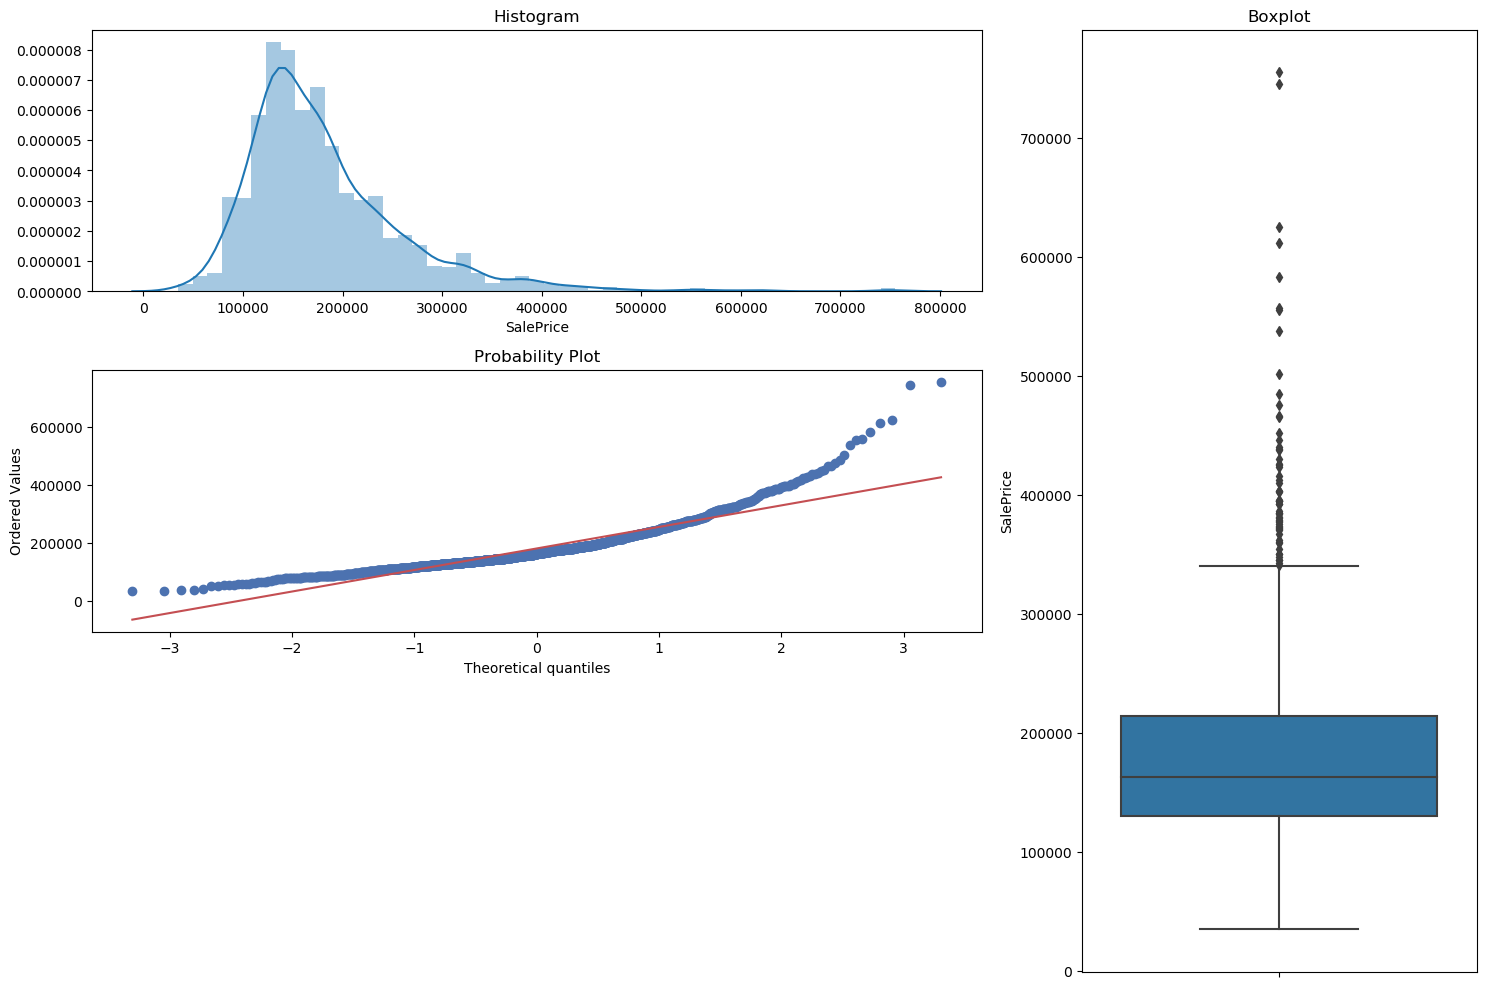

In [44]:
chart('SalePrice')

The target variable is a little right skewed

In [45]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
test        

Following might have outliers:
LotArea
BsmtFinSF1
BsmtFinSF2
LowQualFinSF
BsmtHalfBath
LowQualFinSF
TotRmsAbvGrd
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal

In [46]:
def boxplot(x):
    
    plt.figure(figsize=(20,5))
    #plt.subplot(i)
    sns.boxplot(df[x])
    plt.title(x)
    plt.plot()

In [47]:
y = """LotArea
BsmtFinSF1
BsmtFinSF2
LowQualFinSF
BsmtHalfBath
LowQualFinSF
TotRmsAbvGrd
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal"""    

vr_list = y.split("\n")

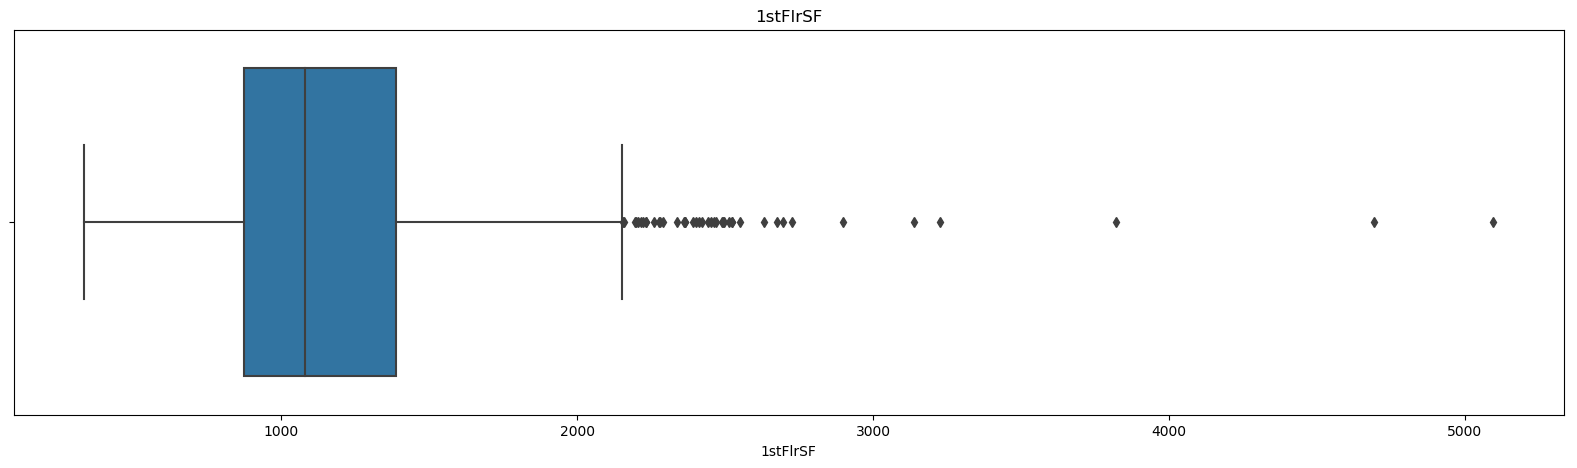

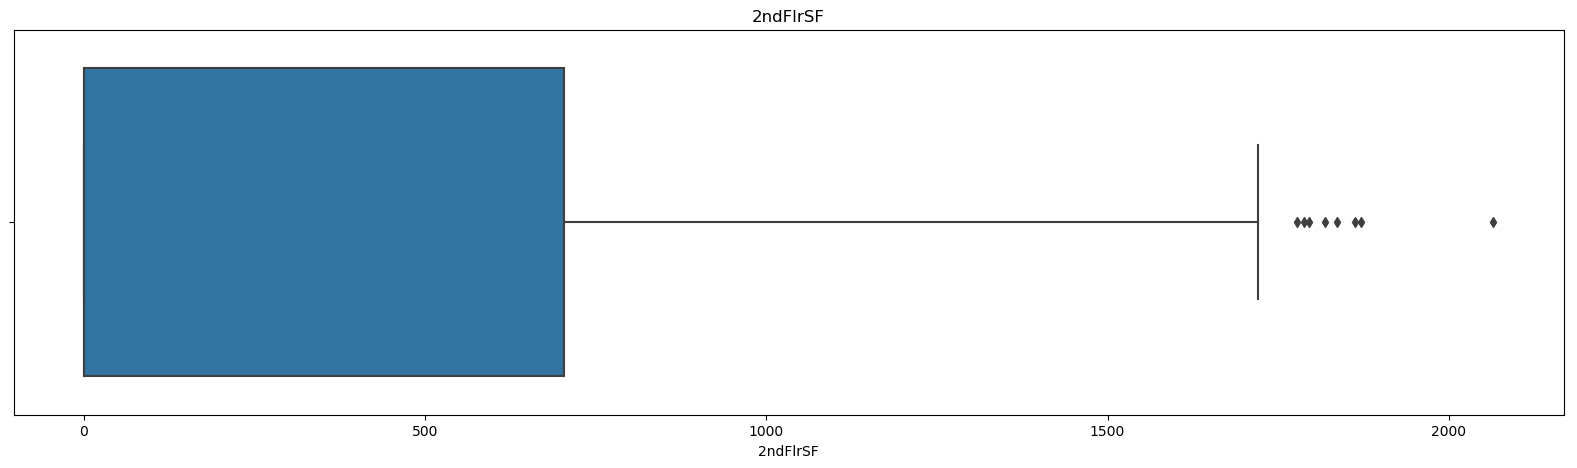

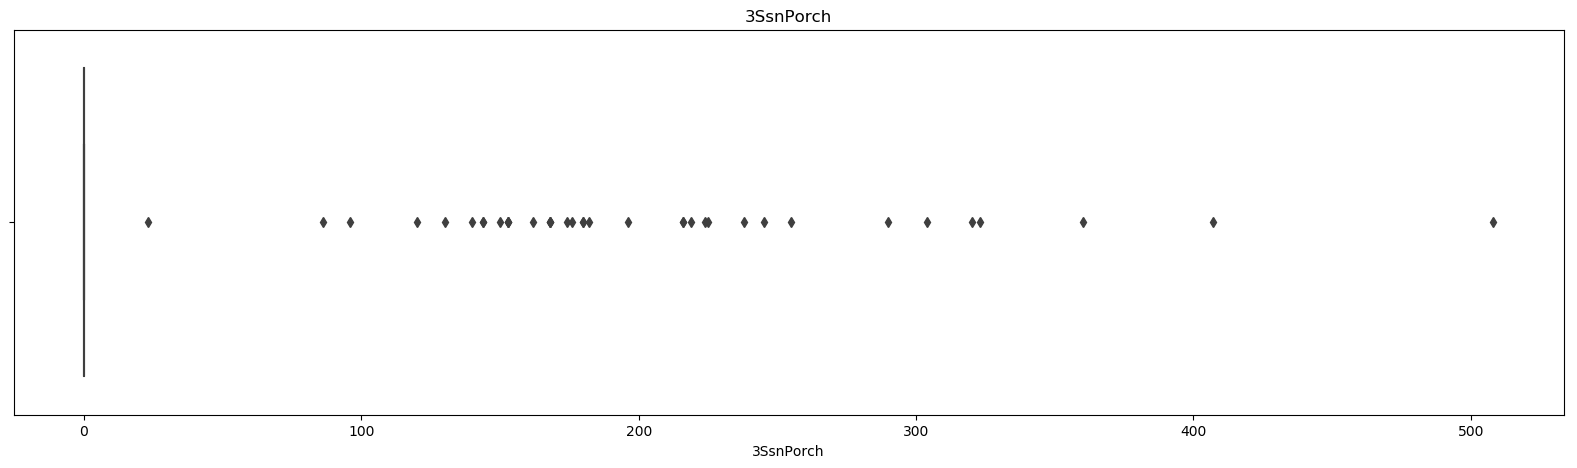

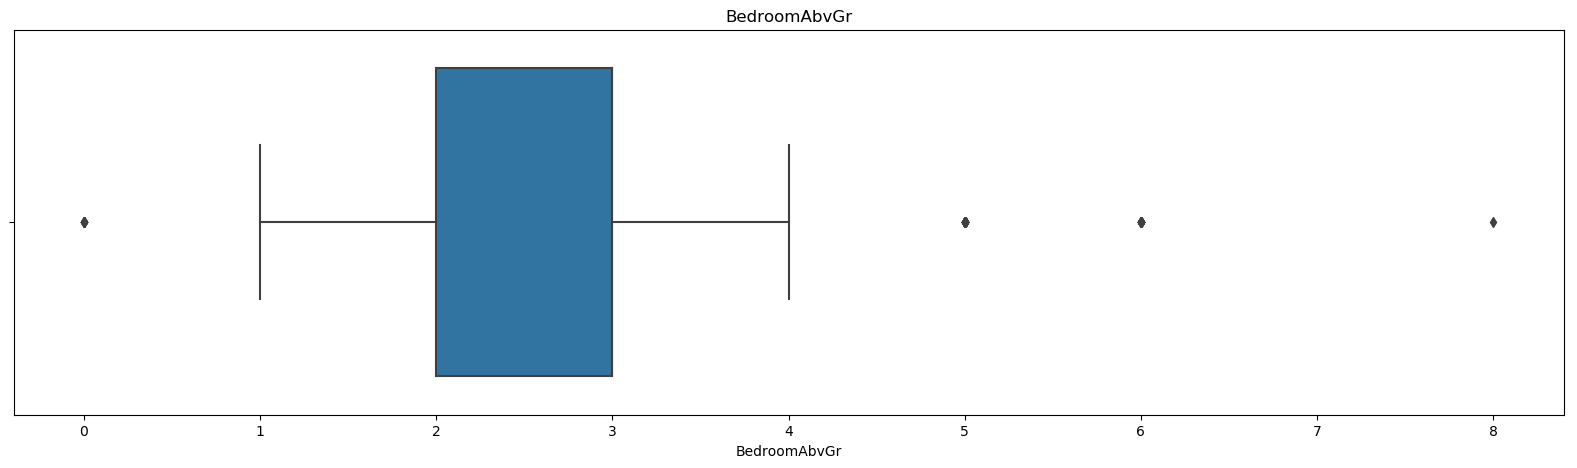

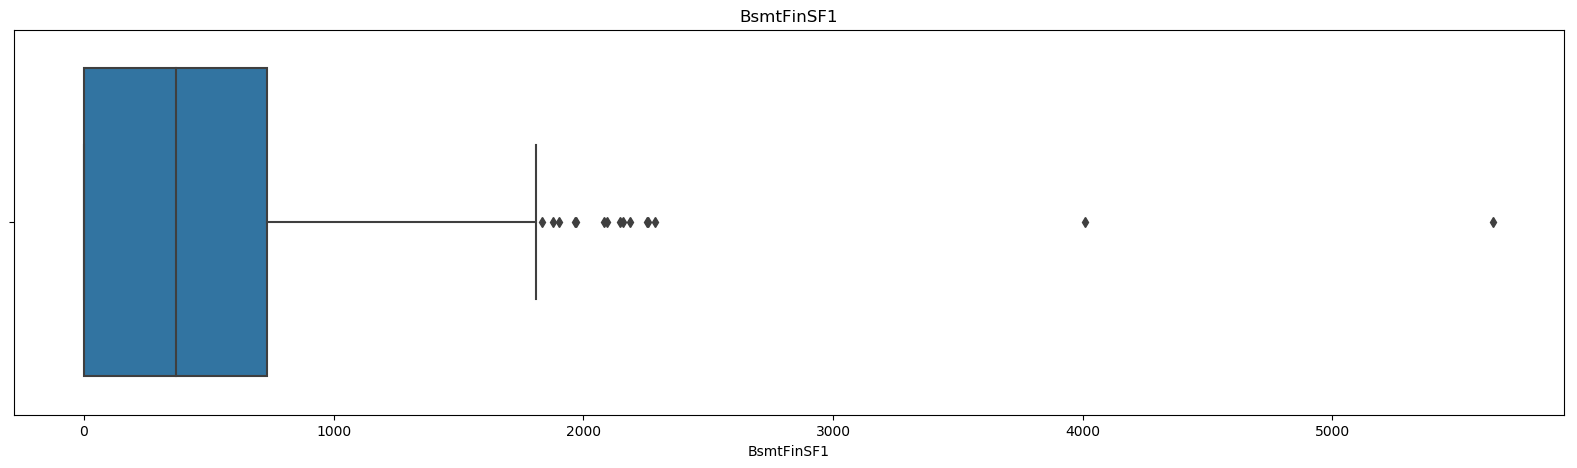

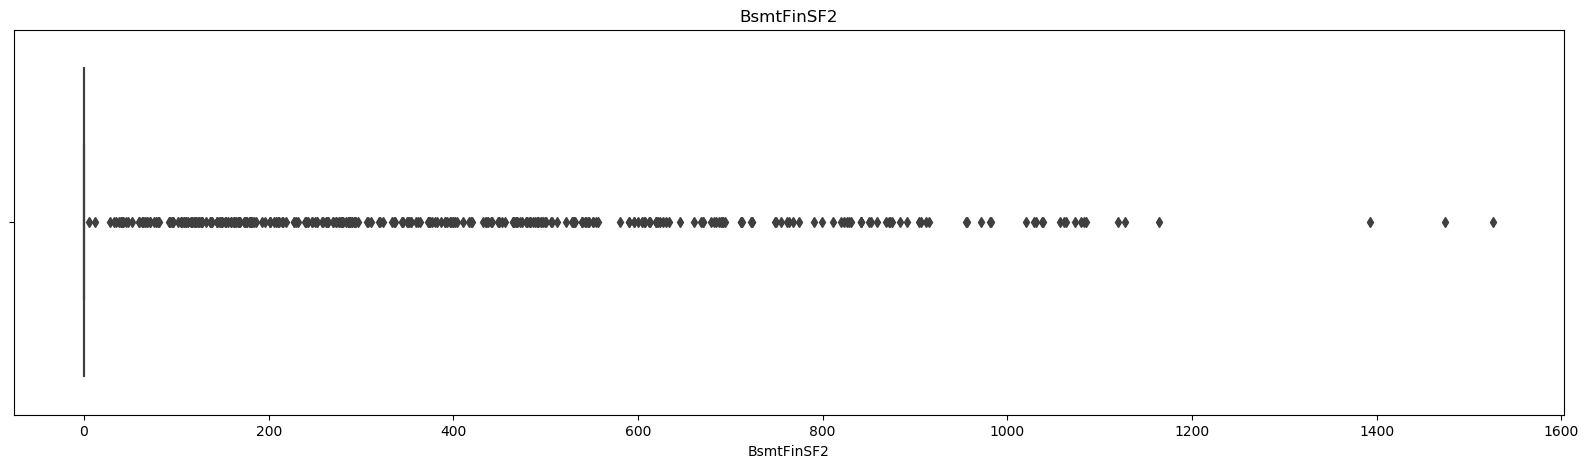

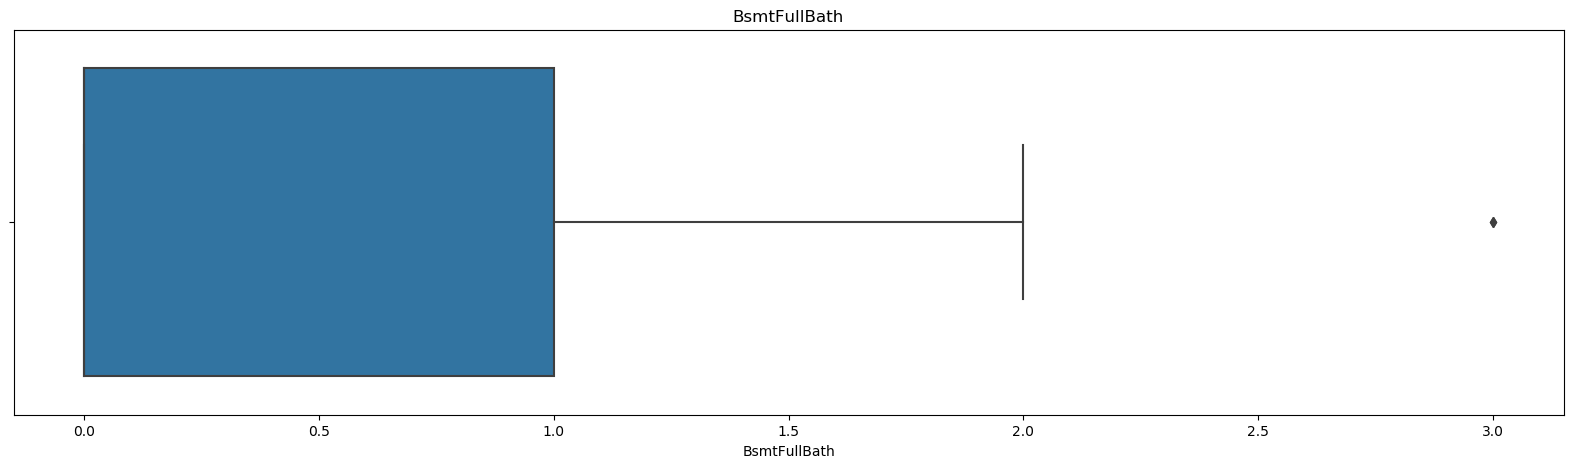

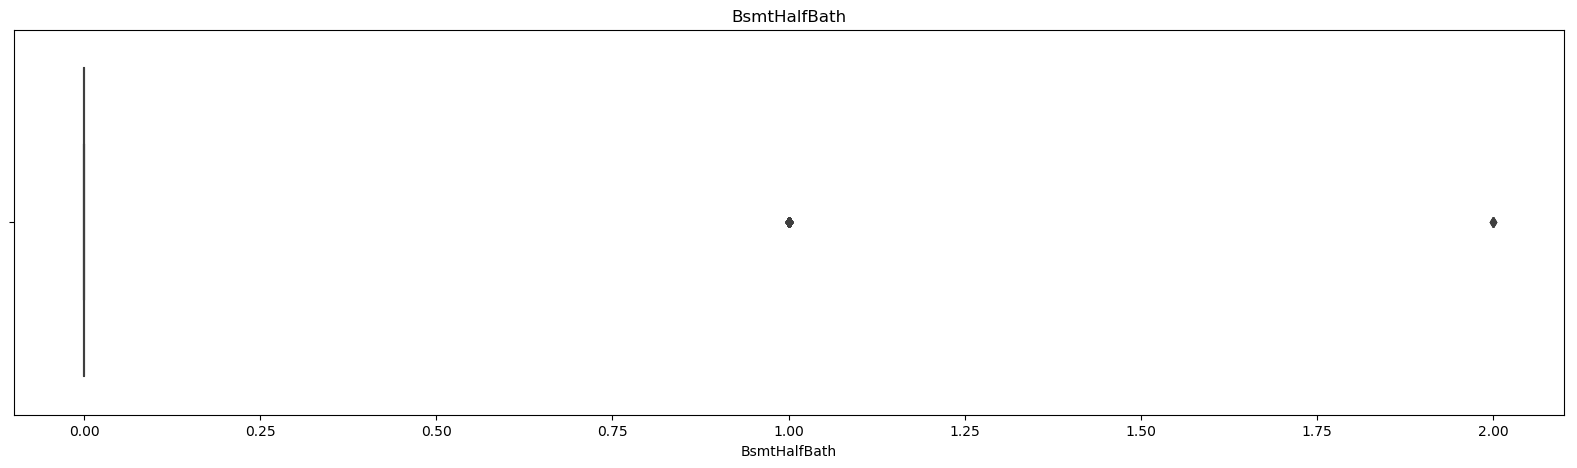

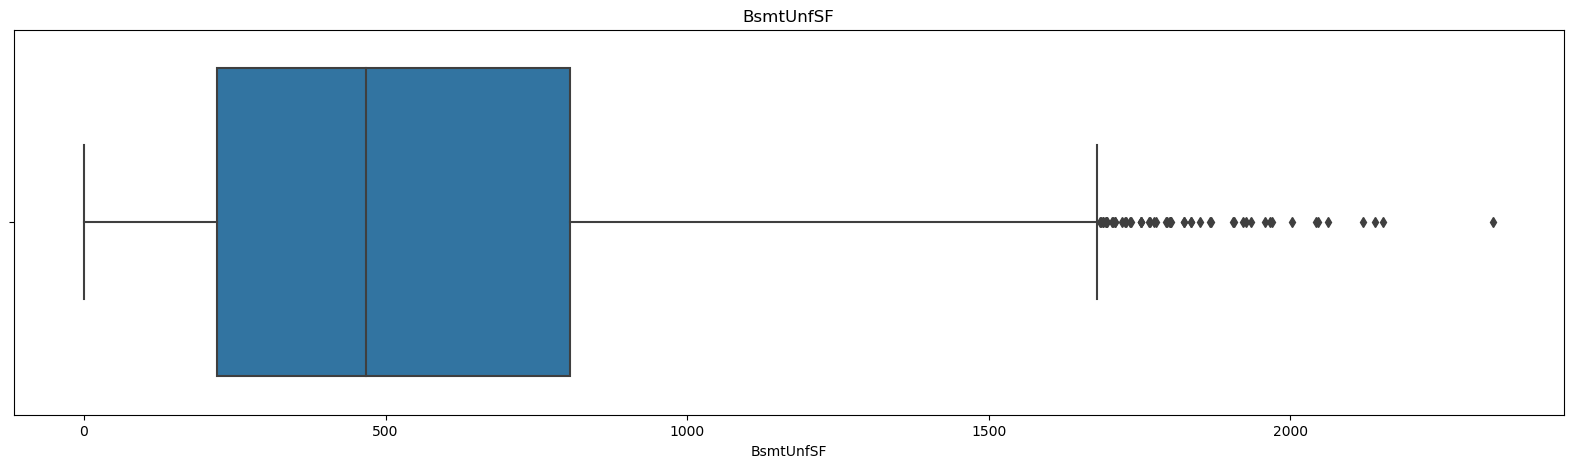

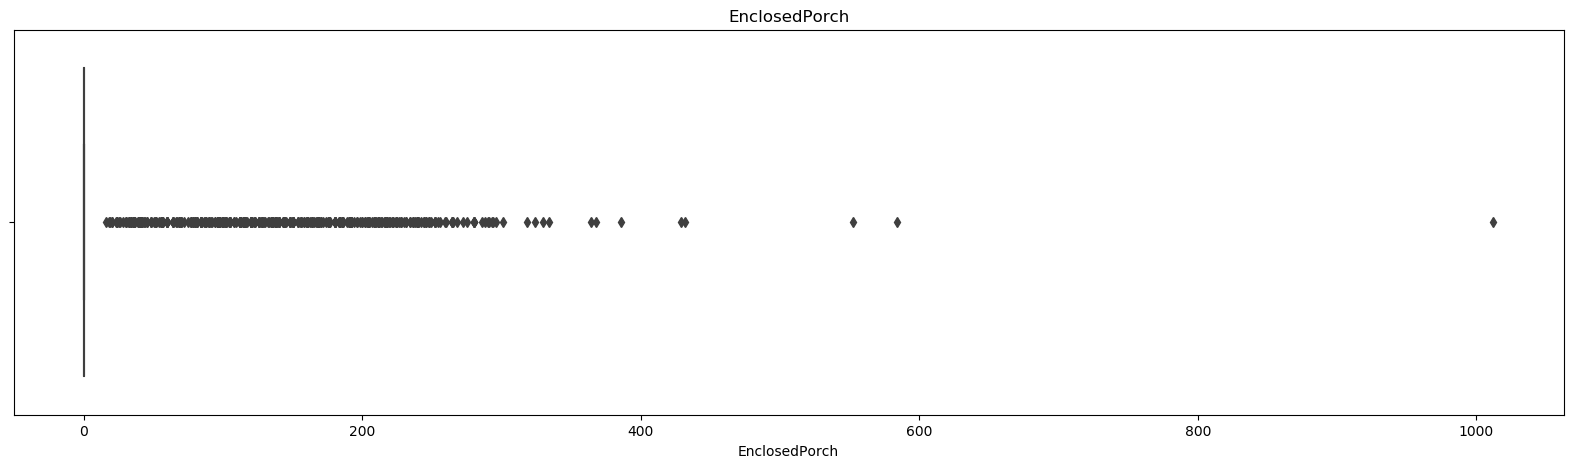

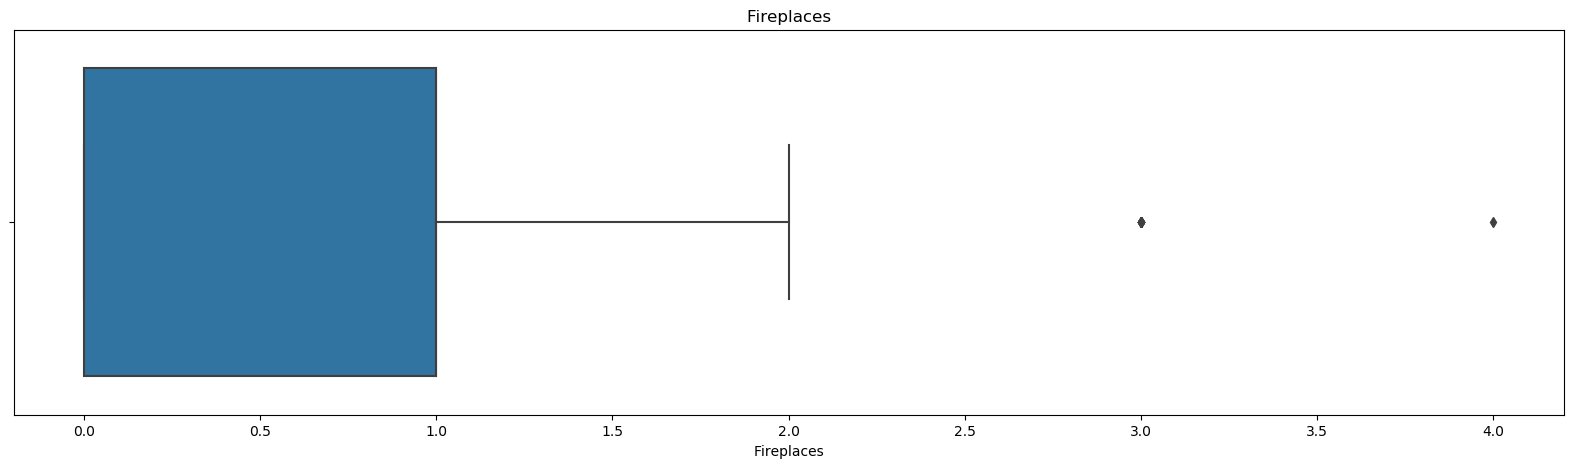

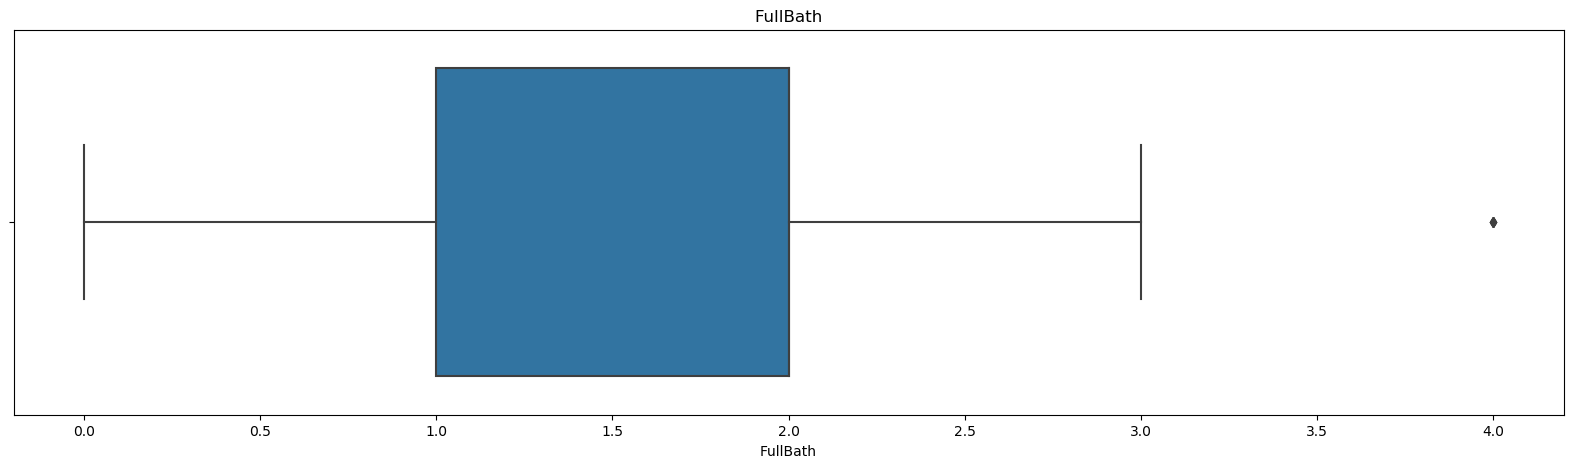

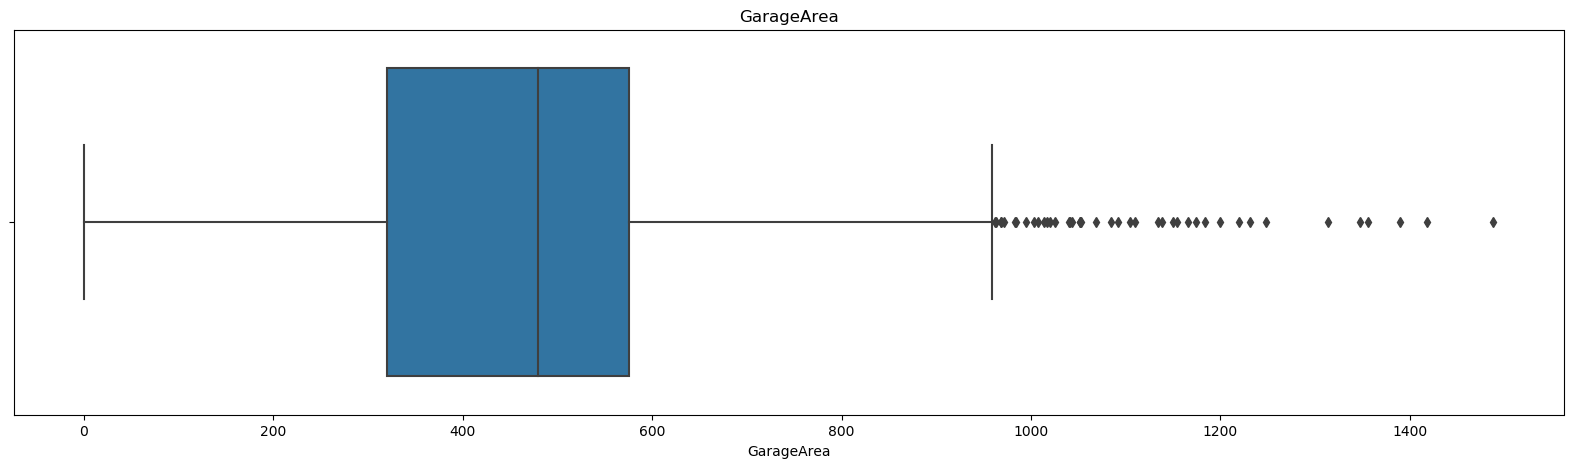

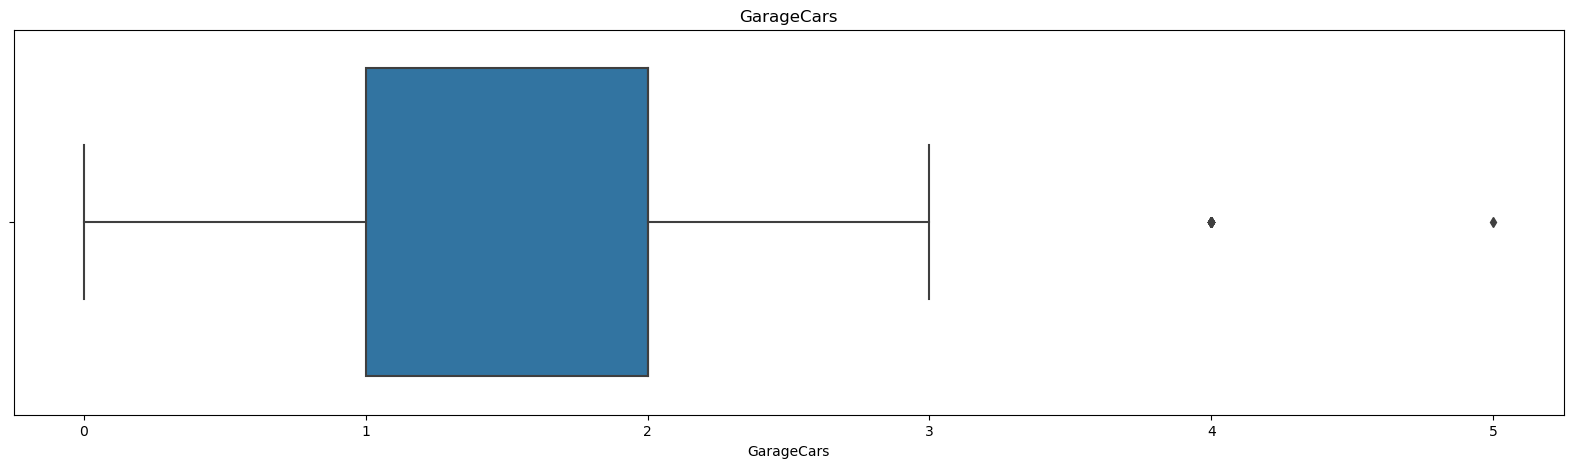

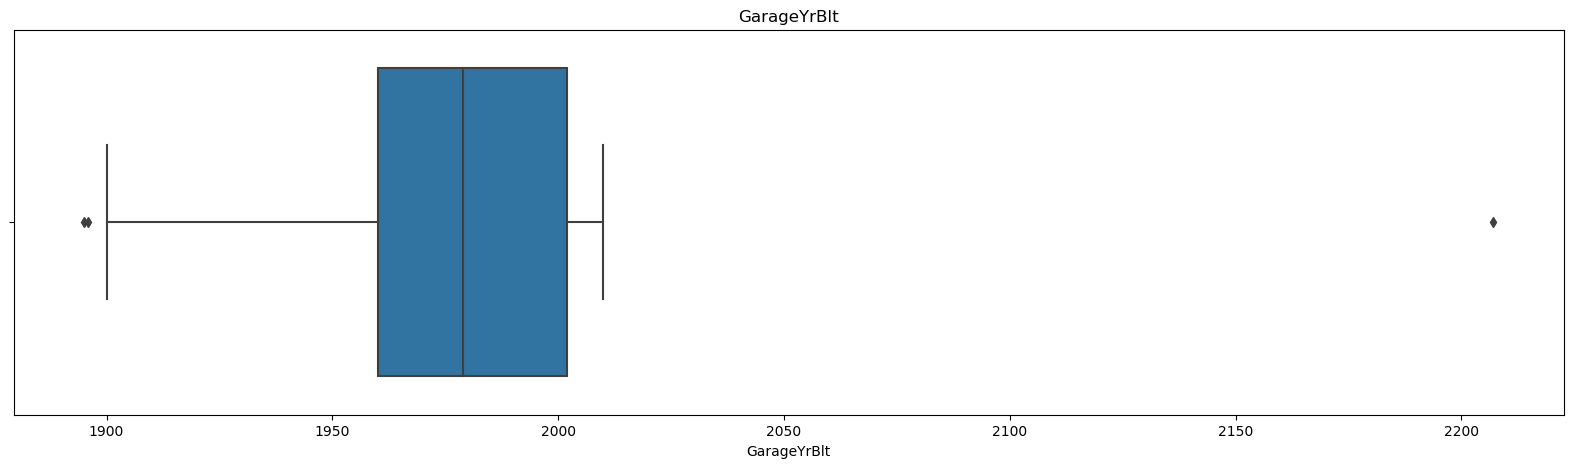

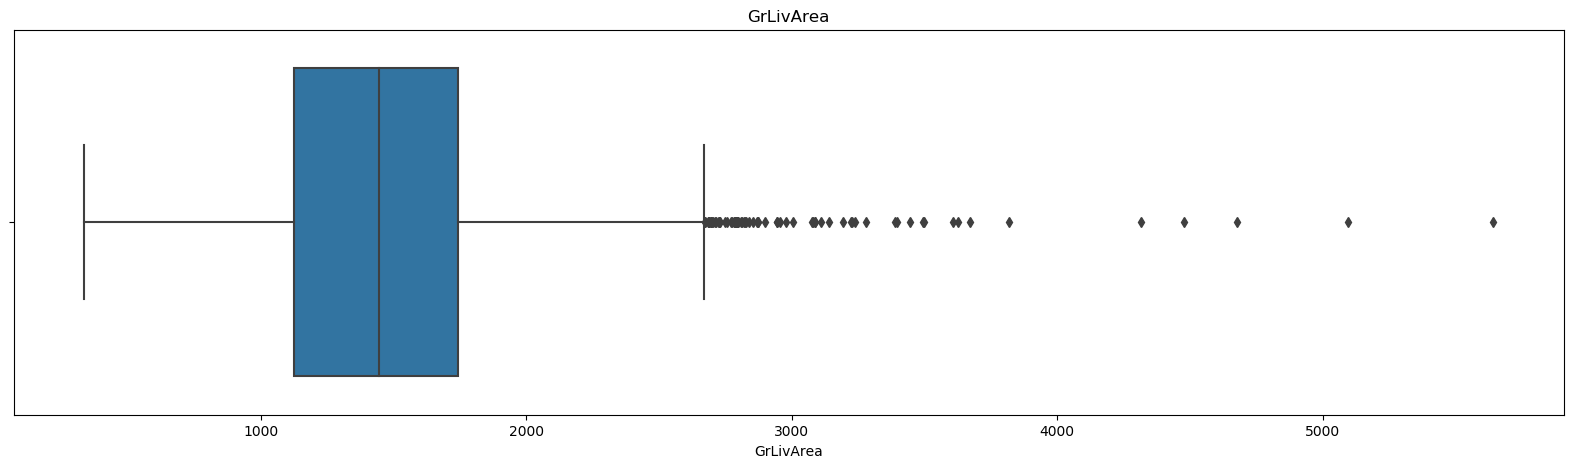

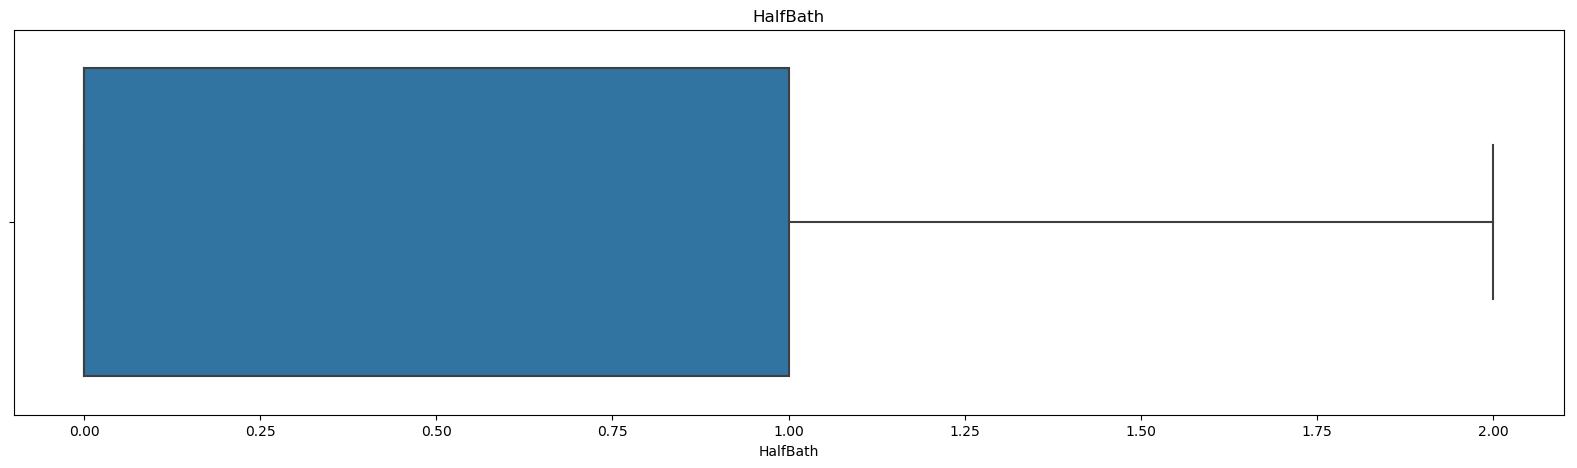

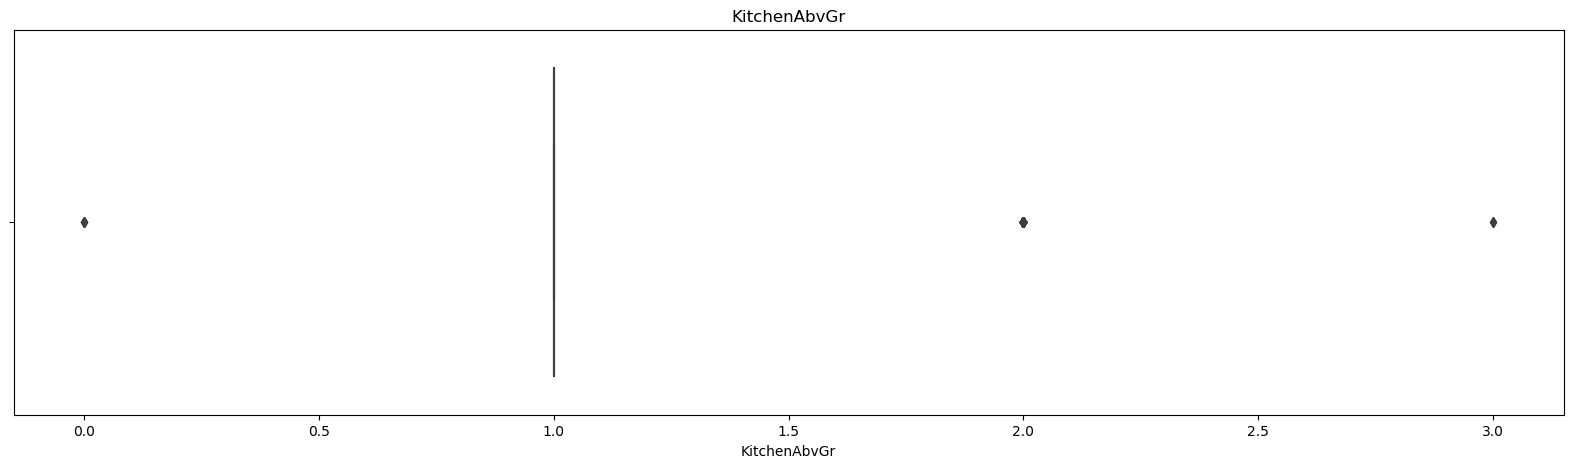

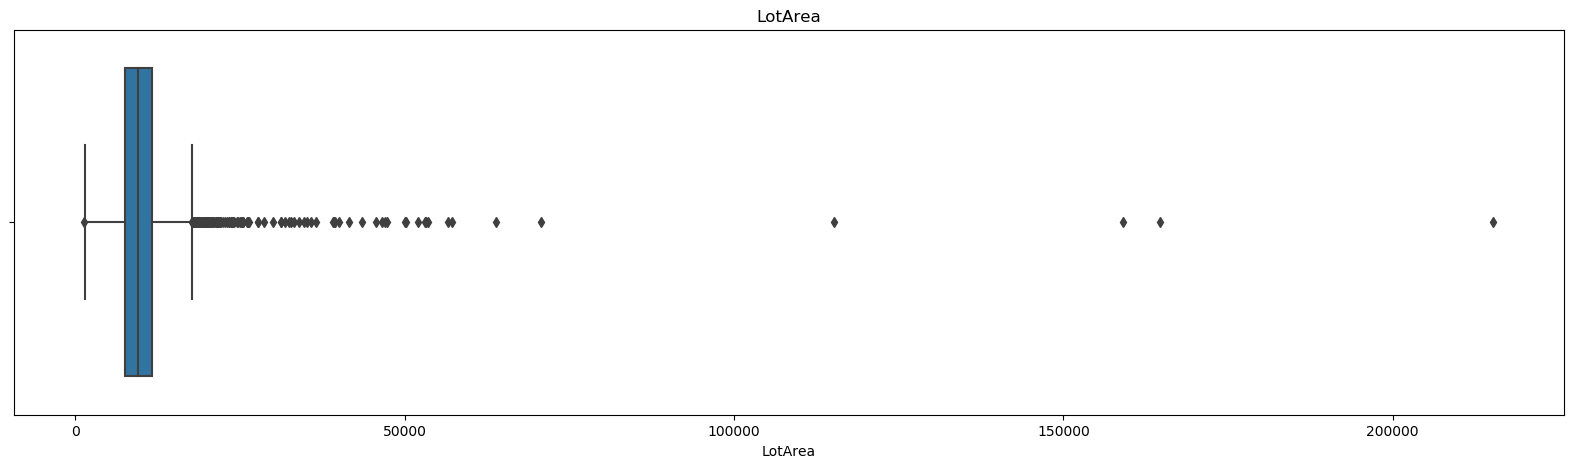

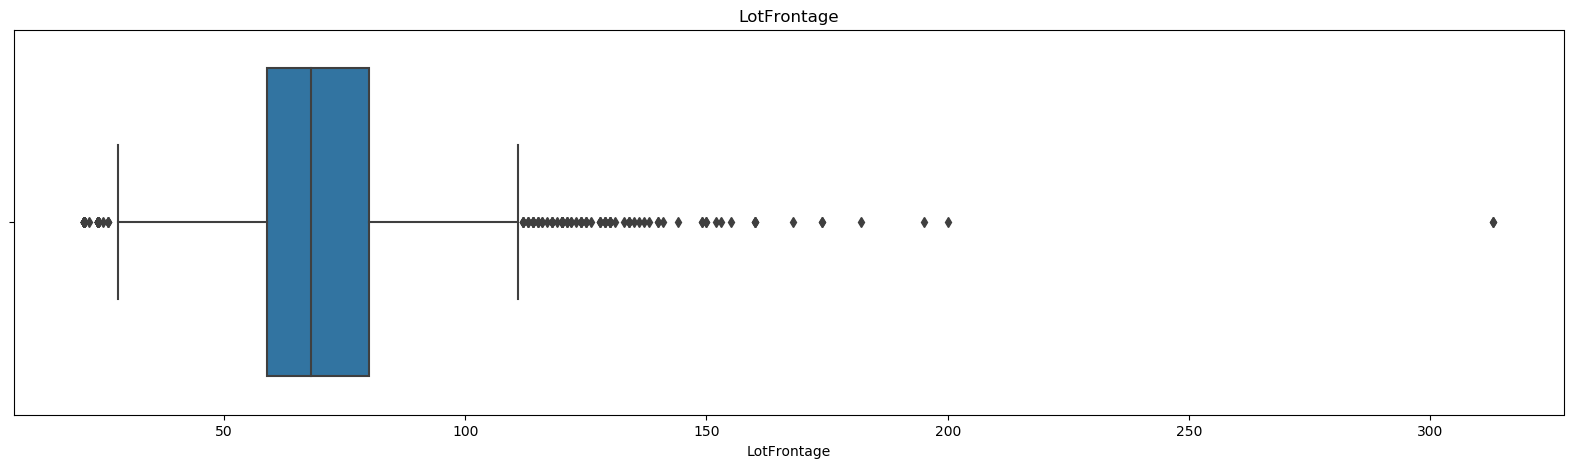

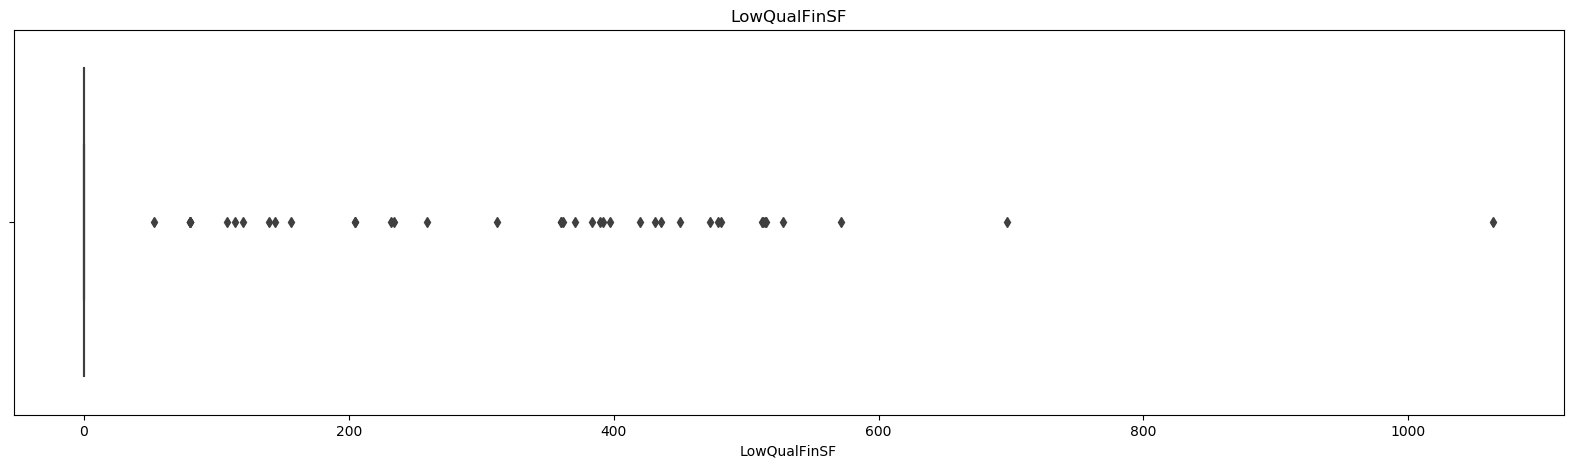

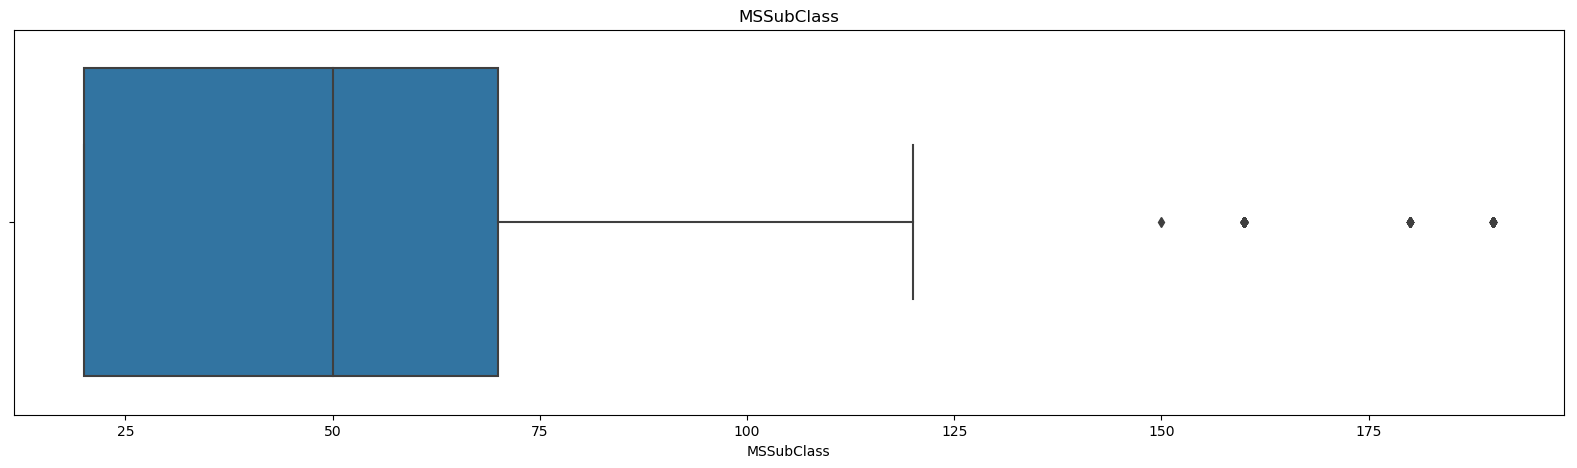

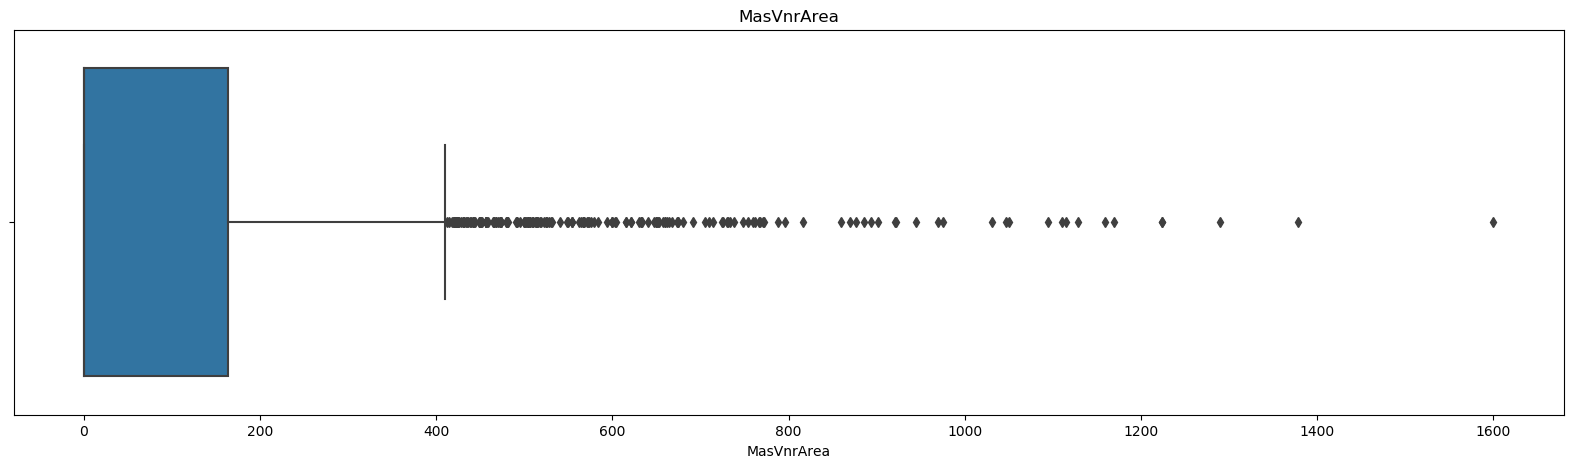

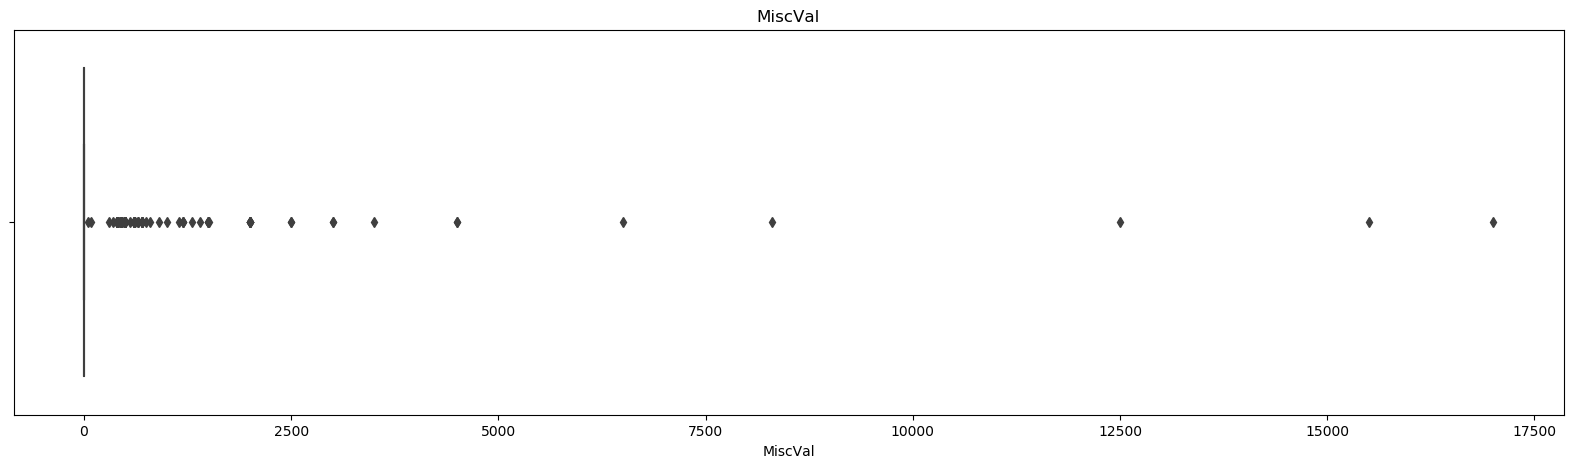

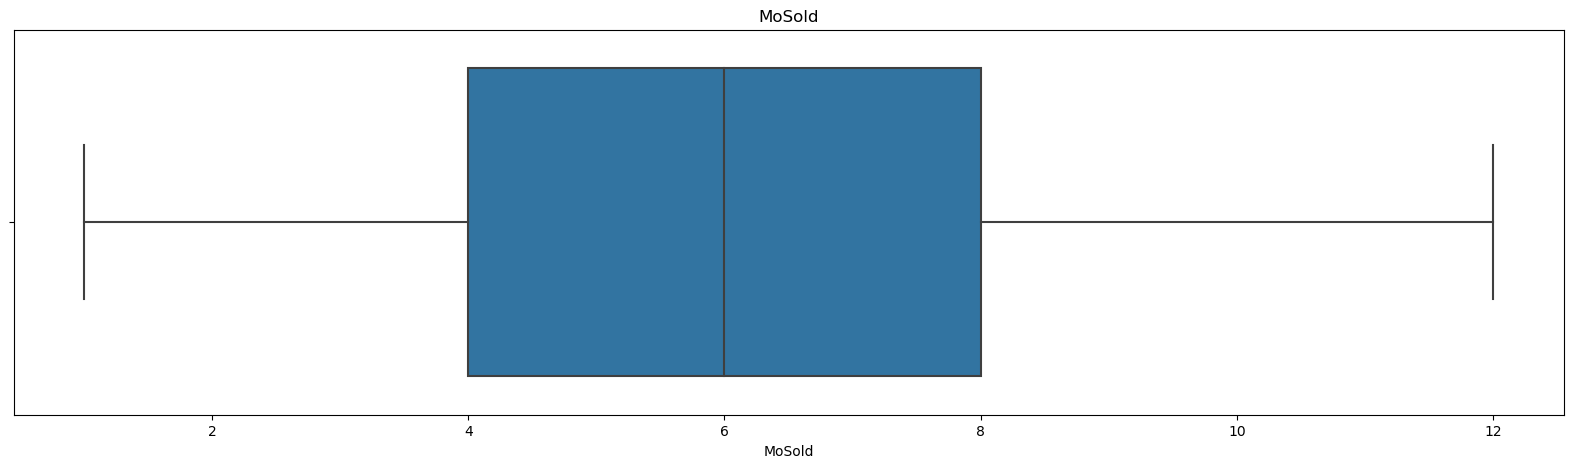

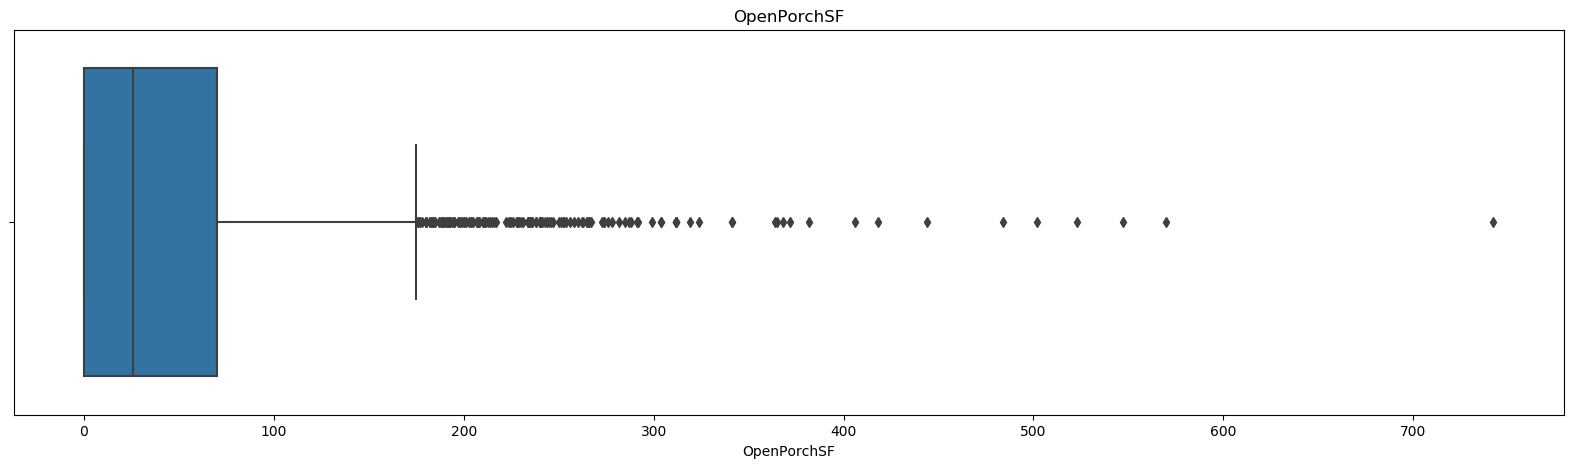

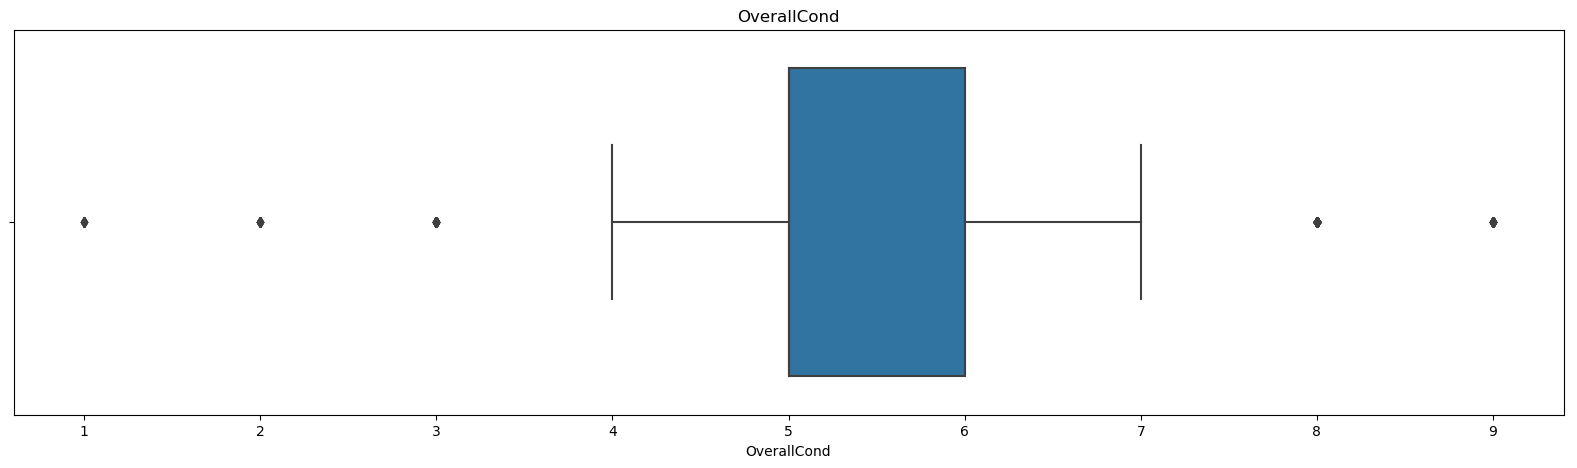

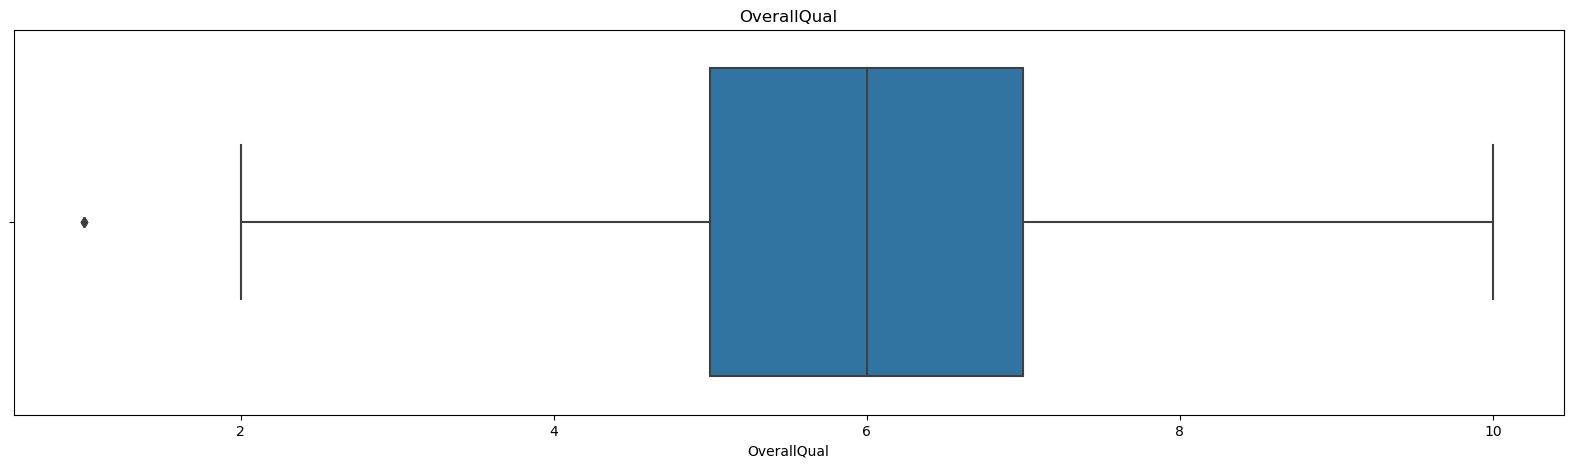

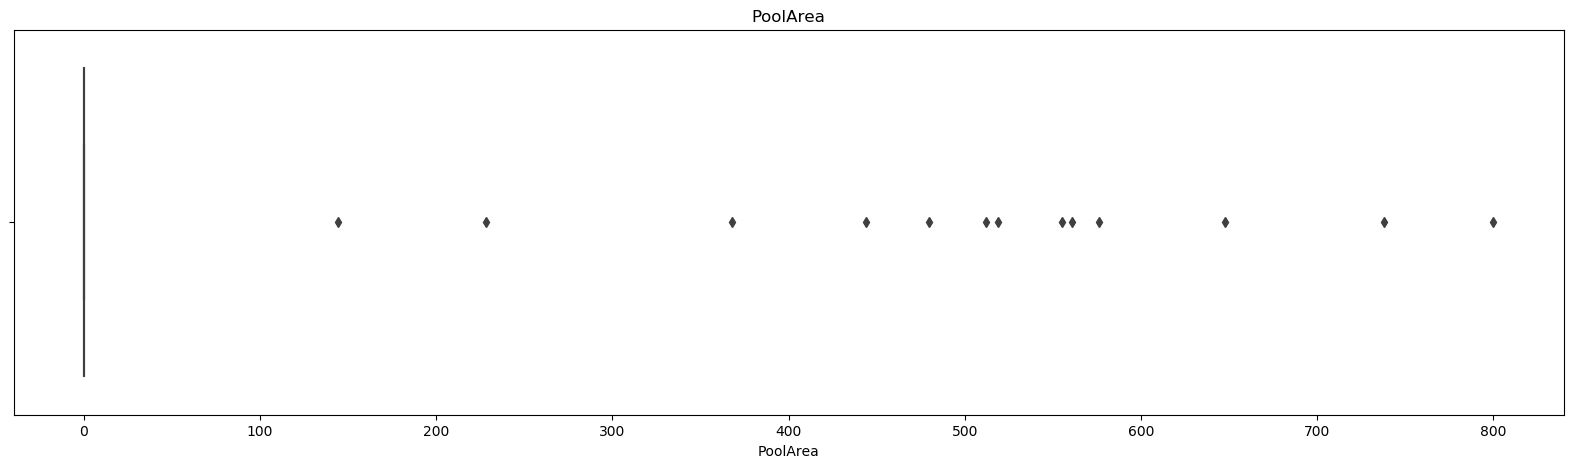

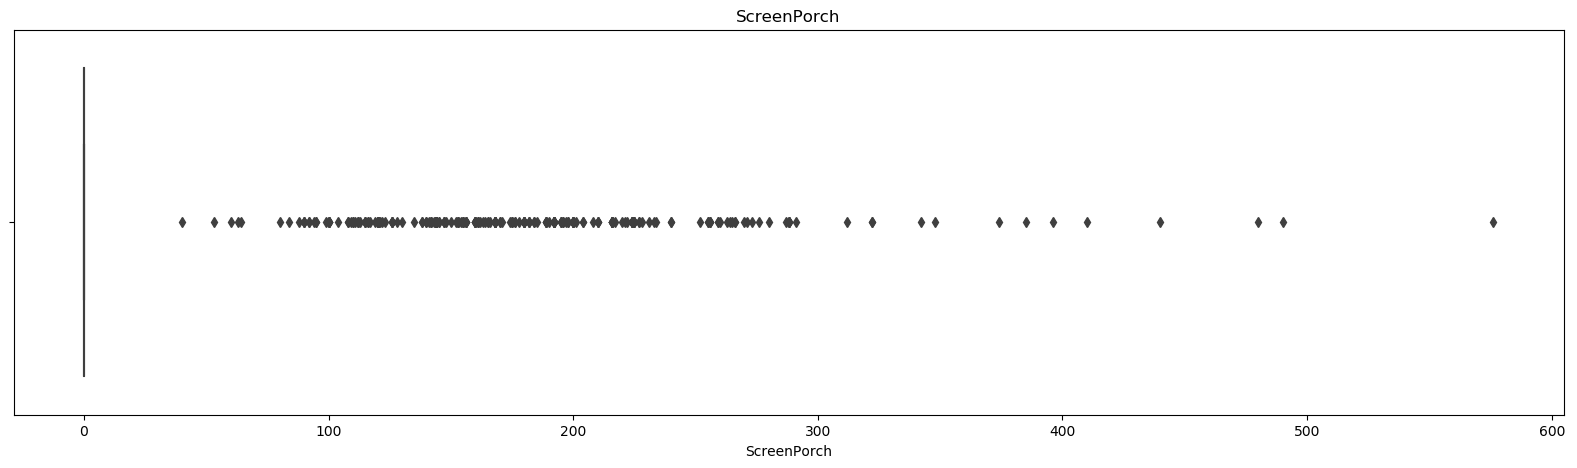

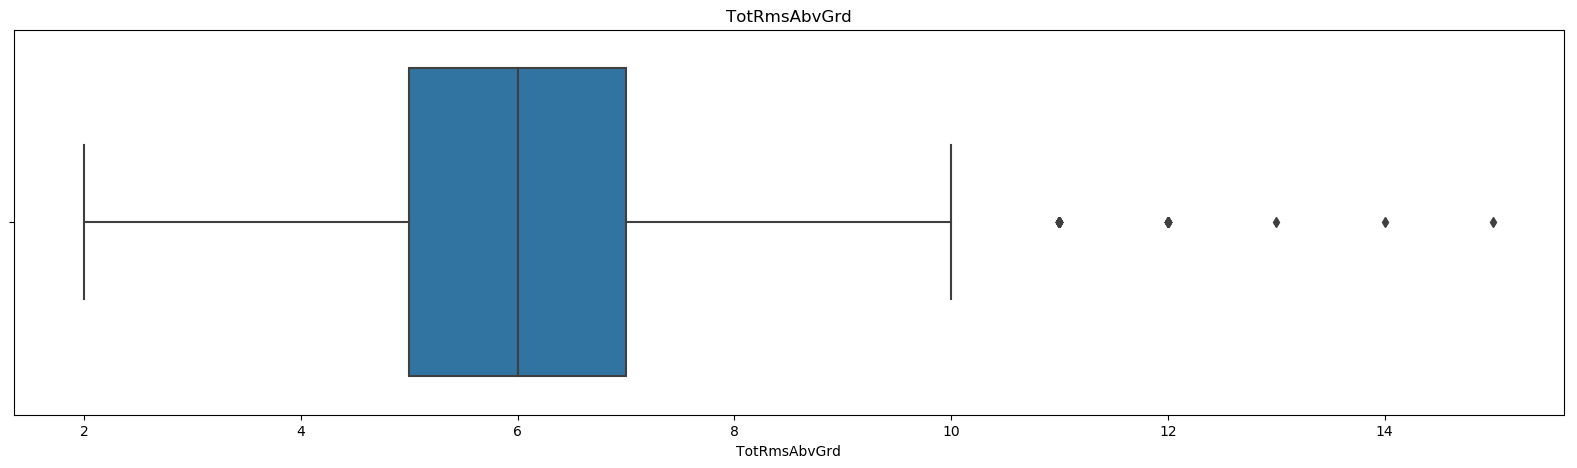

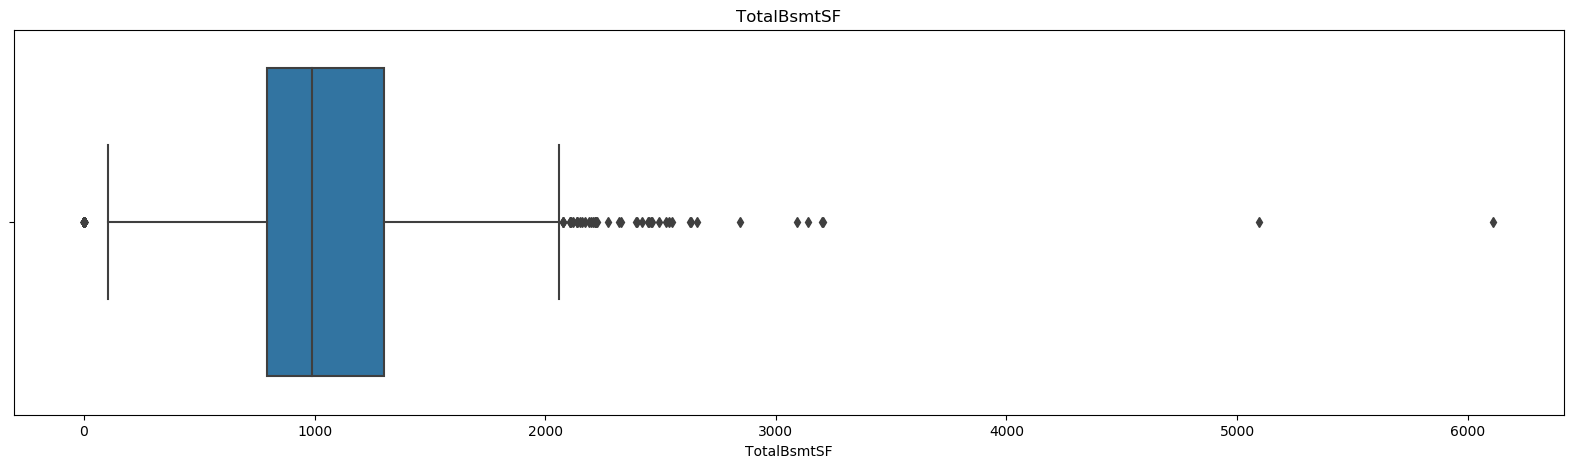

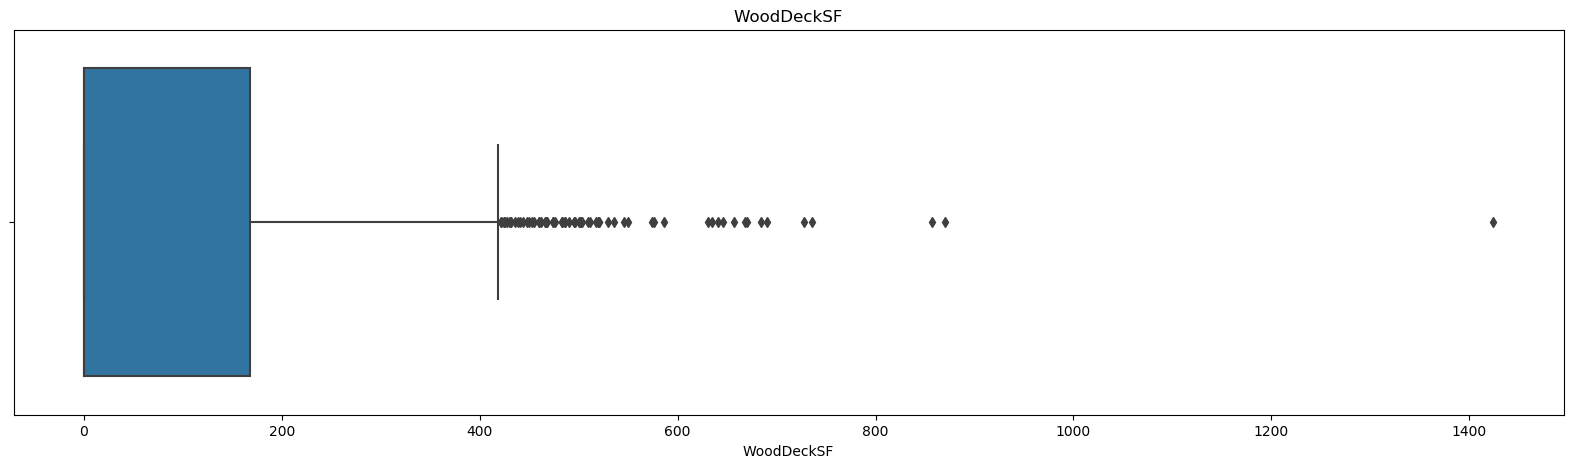

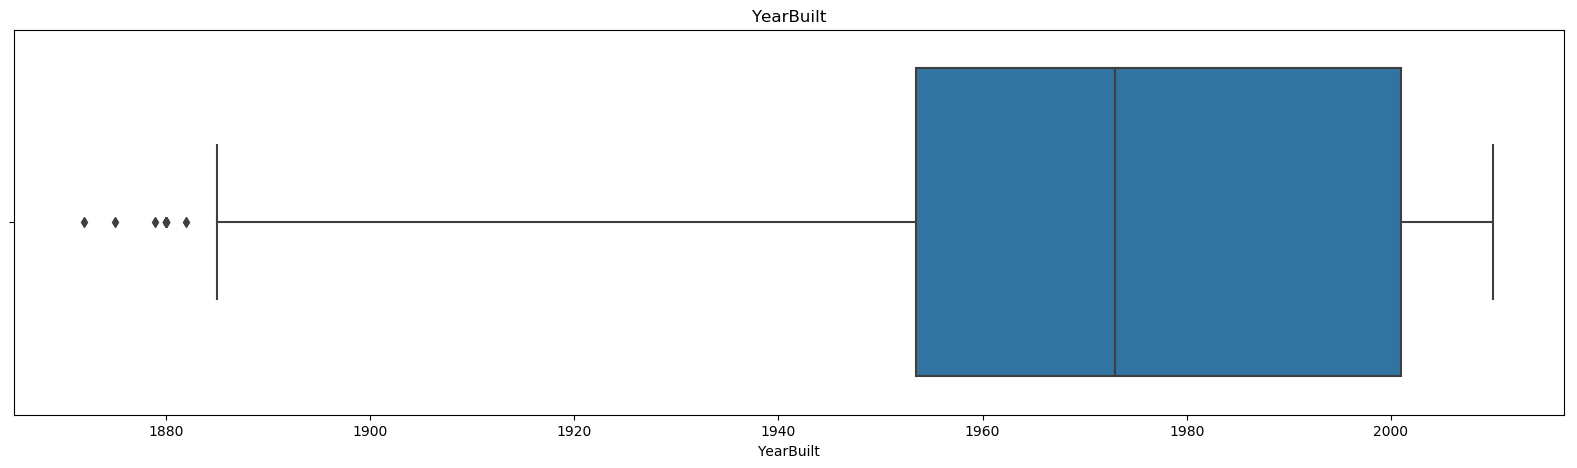

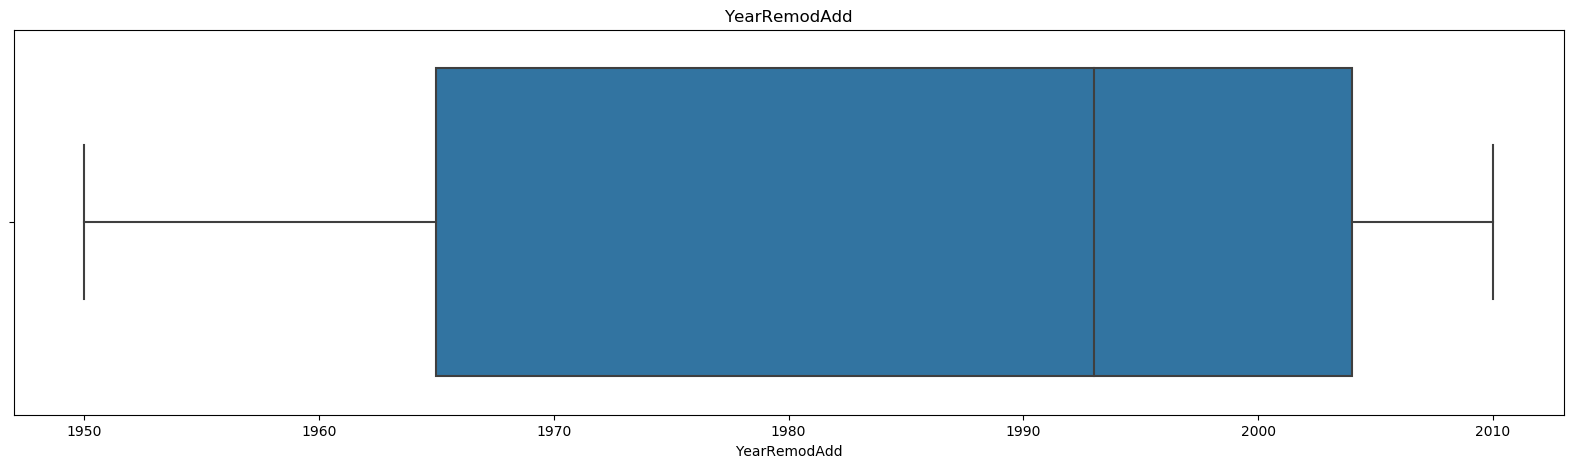

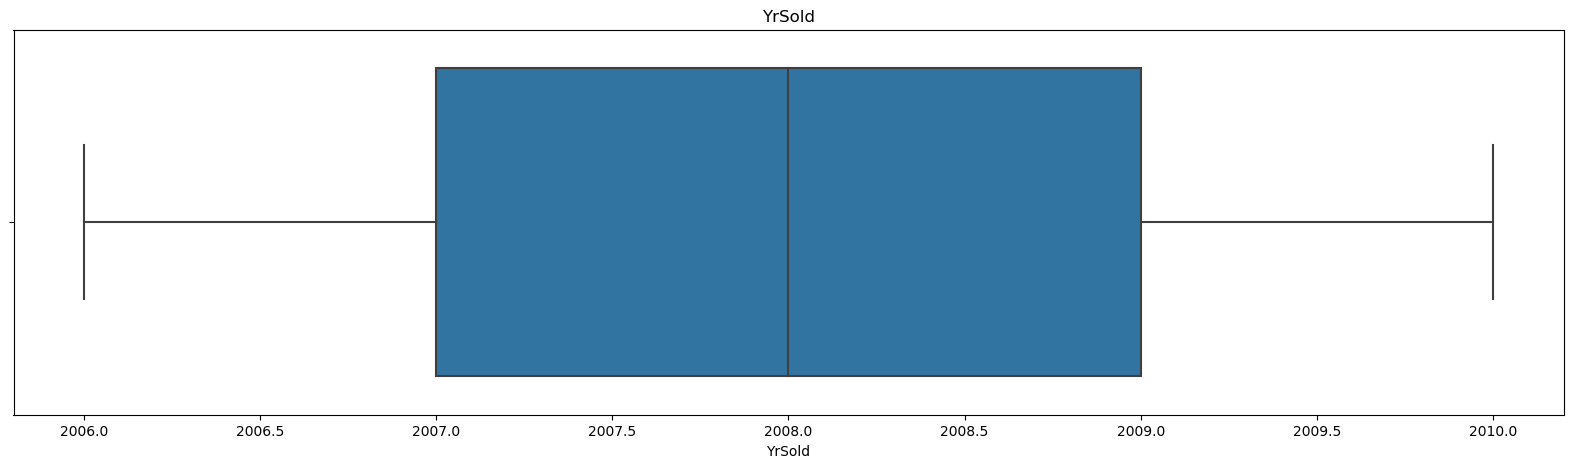

In [48]:
#for index,x in enumerate(vr_list):
#    box(x, index+1)
for x in (num_cols):
    boxplot(x)

Potential Outliers in

1stFlrSF >= 3000

2ndFlrSF >= 1500

BedroomAbvGr >= 5, BedroomAbvGr = 0 (this seems weird)

BsmtFinSF1 >= 3000

BsmtFullBath = 3

Enclosed Porch >=600

Fireplaces >=3

FullBath = 4

GarageYrBlt > 2200 (this is wronng needs to be imputed) also, 3 data points with yr built < 190
0

LotArea >= 150000

LotFrontage > 300

LowQualFinSF > 1000

MSSubClass > 125

OpenPorchSF > 700

OverallQual < 1 (check, min OverallQual is 1)

TotalBsmtSF >5000

WooddeckSF > 1400




LotArea has outliers above 100000

BsmtFinSF1 has outliers above 5000

WoodDeckSF has outliers above 800

EnclosedPorch above 500

MiscVal above 8000

Removing outliers from df

#### Before we check multi collineraity, let's check the univariate and bivariate distributions 

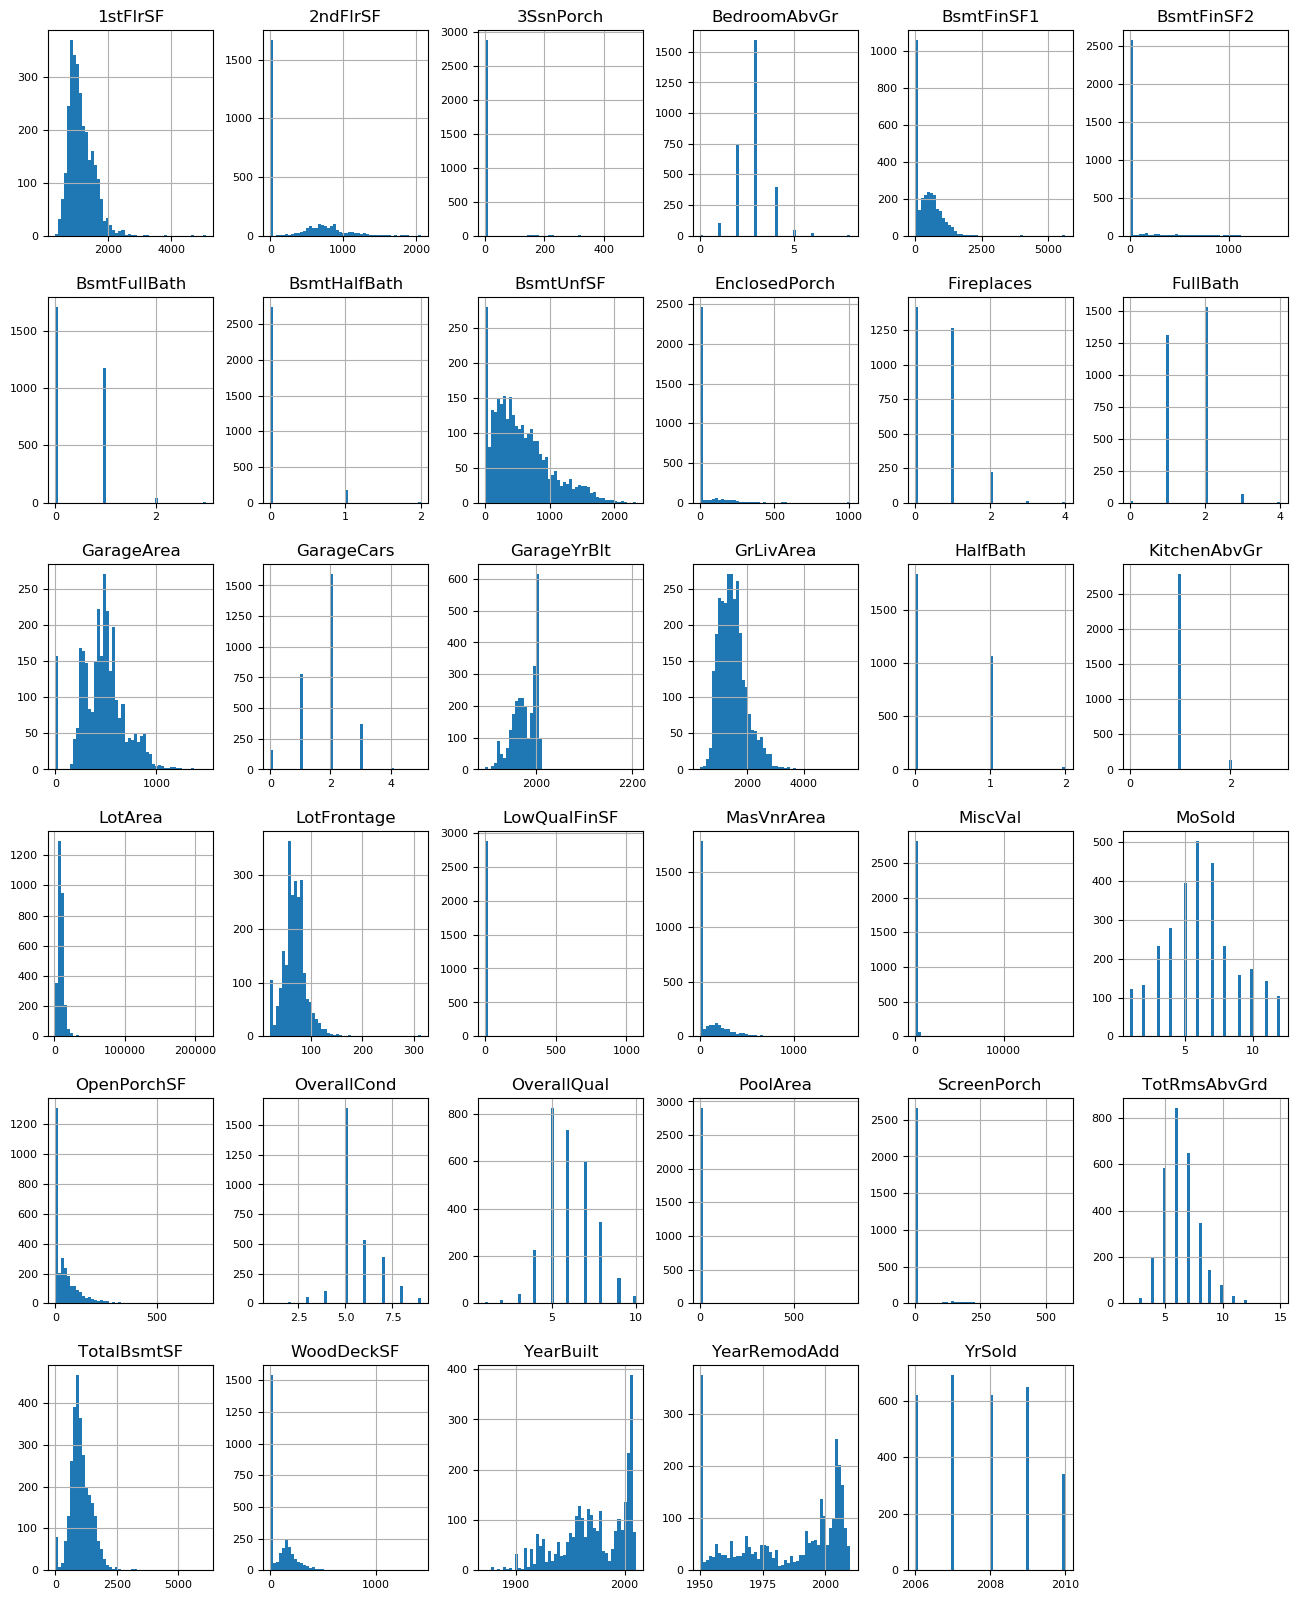

In [49]:
df[num_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

A few observations:

Foloowing variables have good distribution, and hence, can be pivotal in the analysis: 1stFlrSF, GrLivArea, TotalBsmtSF, BsmntUnfSF, LotFrontage, YearBuilt, YrSold, TotRmsAbvGrd, OverallQual, MoSold, LotArea

1. 1stFlrSF, GrLivArea, TotalBsmtSF, SalesPrice have similar distributions
2. LotArea and LotFrontage have similar distribution
3. Some variables have high number of 0s (0 probably implies that, that feature does't exist for the house). This might have an implication on correlations
4. YearBuilt, YearRemodeAdd (lots of 0s though!), GarageYrBlt have similar distribution
5. Many variables don't have a good spread and may not be able to tell much about the SalesPrice. We might want to remove these variables. These variables are:

    2dFlrSF
    3SsnPorch
    BsmtFinSF2
    BsmtHalfBath
    EnclosedPorch
    KitchAboveGr
    LowQualFinSF
    MiscVal
    PoolArea
    ScreenPorch
    WoodDeckSF (lots of 0s)
    
6. Variables that seem helpful are:
    1stFlrSF
    BedroomAboveGr
    BsmtFinSF1 (lots of 0s)
    BsmtFullBath
    BsmtUnfSF
    Fireplaces
    FullBath
    GarageArea (lots of 0s)
    GarageCars (should be highly correlated to GarageArea)
    GarageYrBlt
    GrLivArea
    HalfBath
    LotArea
    LotFrontage(should be highly correlated with LotArea)
    MoSold
    OpenPorchSF (lots of 0s)
    OverallCond
    OverallQual
    TotRmsAbvGrd
    TotalBsmtSF (lots of 0s)
    YearBlt
    YearRemodAdd (lots of 0s)
    YrSold

##### All these variables are right skewed and can benefit from log transformation

1stFlrSF
2ndFlrSF
BsmtFinSF1
BsmtUnfSF
GarageArea
GrLivArea
LotArea
LotFrontage
TotalBsmtSF



In [50]:
var = """1stFlrSF
2ndFlrSF
BsmtFinSF1
BsmtUnfSF
GarageArea
GrLivArea
LotArea
LotFrontage
TotalBsmtSF"""

var = var.split('\n')

In [51]:
#for i in range(len(var)):
    #df[var[i]
    
for i in var:
    df[i] = np.log(1 + df[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B9FA6FA58>,
      dtype=object)

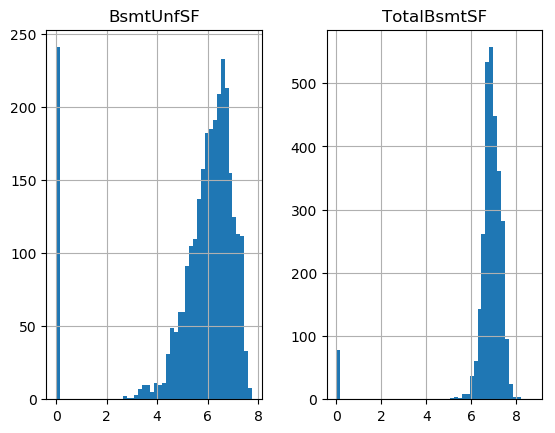

In [52]:
#these values not seem more left skewed
df[['BsmtUnfSF','TotalBsmtSF']].hist(bins=50)

#### extracting train and test from df

In [53]:
train = df[df['test'] == 0]
test = df[df['test'] == 1]

In [54]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
0,6.753438,6.751101,0,NaN,3,1Fam,TA,No,6.561031,0.0,GLQ,Unf,1.0,0.0,Gd,5.017280,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,6.308098,2.0,TA,RFn,TA,Attchd,2003.0,7.444833,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,9.042040,Inside,4.189655,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,6.753438,AllPub,0,2003,2003,2008,0
1,7.141245,0.000000,0,NaN,3,1Fam,TA,Gd,6.886532,0.0,ALQ,Unf,0.0,1.0,Gd,5.652489,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,6.133398,2.0,TA,RFn,TA,Attchd,1976.0,7.141245,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9.169623,FR2,4.394449,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,7.141245,AllPub,298,1976,1976,2007,0
2,6.825460,6.765039,0,NaN,3,1Fam,TA,Mn,6.188264,0.0,GLQ,Unf,1.0,0.0,Gd,6.075346,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,6.411818,2.0,TA,RFn,TA,Attchd,2001.0,7.488294,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,9.328212,Inside,4.234107,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,6.825460,AllPub,0,2001,2002,2008,0
3,6.869014,6.629363,0,NaN,3,1Fam,Gd,No,5.379897,0.0,ALQ,Unf,1.0,0.0,TA,6.293419,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,6.466145,3.0,TA,Unf,TA,Detchd,1998.0,7.448916,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9.164401,Corner,4.110874,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,6.629363,AllPub,0,1915,1970,2006,0
4,7.044033,6.960348,0,NaN,4,1Fam,TA,Av,6.486161,0.0,GLQ,Unf,1.0,0.0,Gd,6.196444,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,6.729824,3.0,TA,RFn,TA,Attchd,2000.0,7.695758,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,9.565284,FR2,4.442651,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,7.044033,AllPub,192,2000,2000,2008,0


#### Checking Correlations

In [55]:
train_corr = train.corr()

In [56]:
train_corr.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
1stFlrSF,1.000000,-0.349622,0.059939,0.150276,0.198734,0.101011,0.245000,0.012373,0.150662,-0.071356,0.403705,0.368164,0.286678,0.448210,0.222360,0.545990,-0.137608,0.009417,0.071356,0.467442,0.459564,-0.011409,0.310310,-0.022113,0.048757,0.194669,-0.136791,0.456066,0.092998,0.591299,0.102230,0.404150,0.288227,0.234405,0.277496,0.233735,-0.019273,NaN
2ndFlrSF,-0.349622,1.000000,-0.024831,0.438227,-0.205426,-0.115456,-0.212948,-0.025487,0.091389,0.084914,0.132425,0.320788,0.039580,0.075337,-0.007806,0.558571,0.589430,0.012489,0.045680,-0.012775,-0.062428,0.036212,0.083300,0.006446,0.026779,0.155236,0.055934,0.198064,0.042449,0.167849,0.020766,0.509116,-0.058313,0.041559,-0.077171,0.073894,-0.015060,NaN
3SsnPorch,0.059939,-0.024831,1.000000,-0.024478,0.040331,-0.029993,-0.000106,0.035114,0.013768,-0.037305,0.011257,0.035353,0.035267,0.035765,0.023544,0.033086,-0.004972,-0.046635,-0.024600,0.055700,0.070442,-0.004296,0.018796,0.000354,0.029474,-0.005842,0.025504,0.030371,-0.007992,0.044584,-0.031436,-0.006683,0.008590,-0.032771,0.031355,0.045286,0.018645,NaN
BedroomAbvGr,0.150276,0.438227,-0.024478,1.000000,-0.094666,-0.015728,-0.150673,0.046519,0.146395,0.041570,0.107570,0.363252,0.014818,0.086106,-0.064518,0.538848,0.226651,0.037719,0.198597,0.279173,0.296938,0.105607,0.102821,0.007767,0.046544,0.093810,0.012980,0.101676,0.070703,0.168213,0.044300,0.676620,0.027387,0.046854,-0.070651,-0.040581,-0.036014,NaN
BsmtFinSF1,0.198734,-0.205426,0.040331,-0.094666,1.000000,0.130258,0.591148,0.107098,-0.265488,-0.092510,0.146194,-0.085258,0.123409,0.070302,0.026945,-0.014440,-0.005373,-0.012806,-0.134813,0.096966,0.067368,-0.053091,0.152613,0.023465,-0.027153,0.029426,0.045200,0.054199,0.035288,0.185472,0.067278,-0.091730,0.290132,0.116946,0.151209,0.012105,0.033702,NaN


Checking correlations with SalePrice column, and only taking values which are >0.5 (or < -0.5), and arrangin them in descending fashion

In [57]:
train_corr['SalePrice'][abs(train_corr['SalePrice']) >0.5].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.695147
GarageCars      0.640409
1stFlrSF        0.591299
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [58]:
#features = train_corr['SalePrice'][abs(train_corr['SalePrice']) >0.5].index
features = train_corr['SalePrice'].index
features

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'test'],
      dtype='object')

#### The above features seem to be the most important features describing the SalePrice linerarly

#### Let's look at bivariate distributions to better understand the relationship of target variables with the other variables

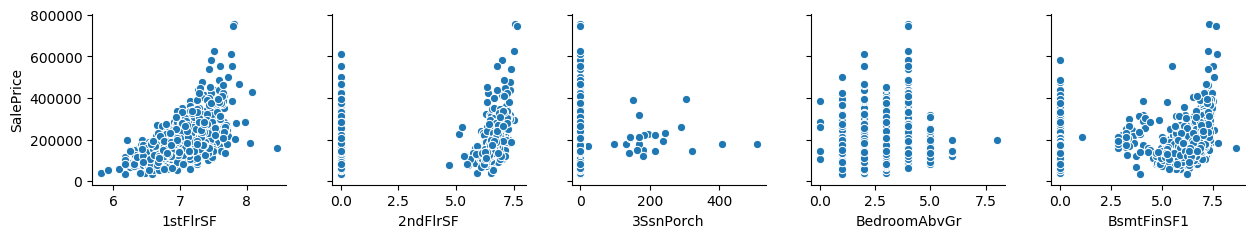

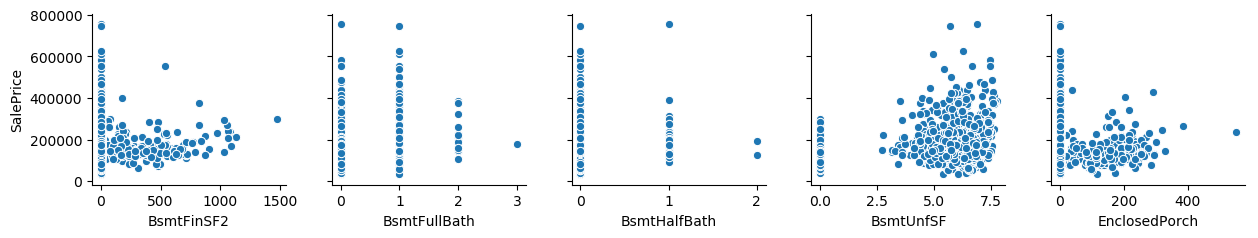

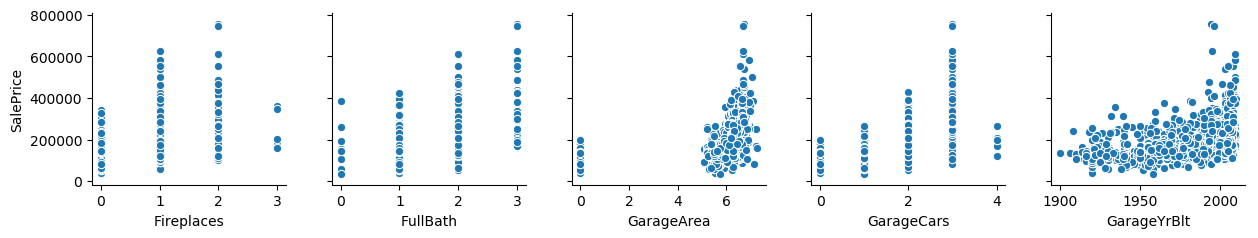

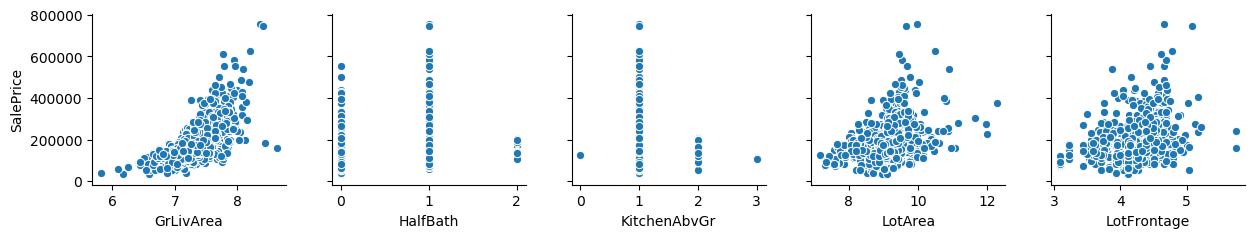

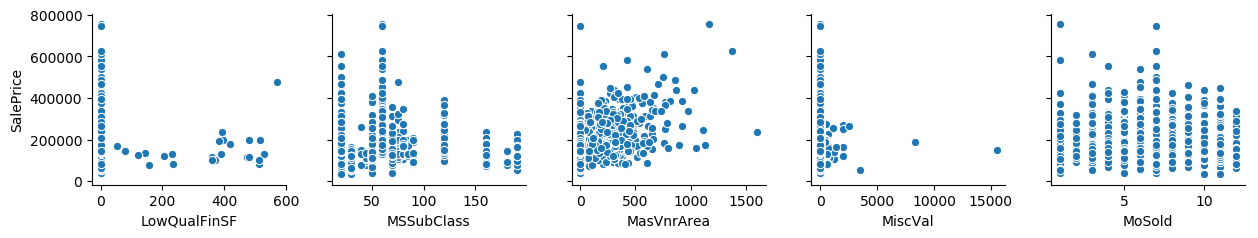

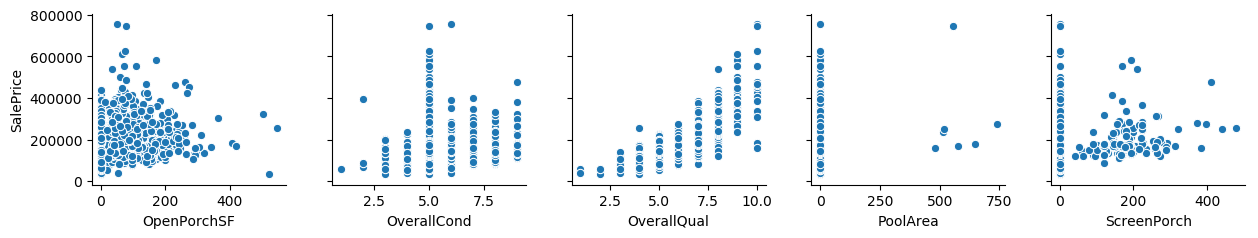

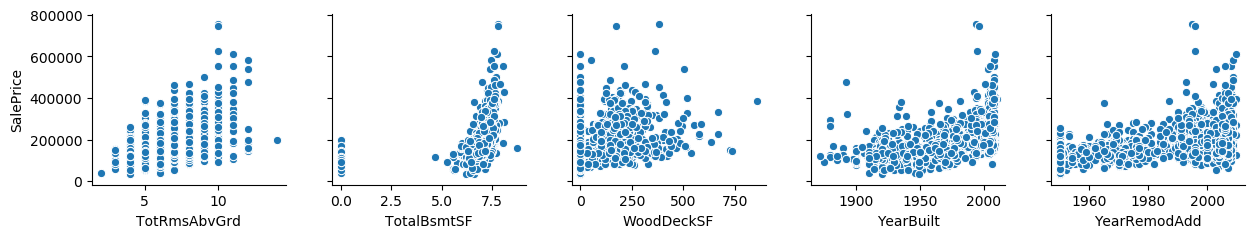

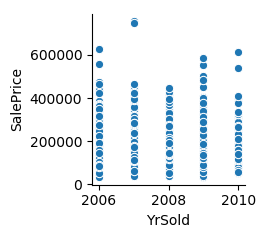

In [59]:
for i in range(0, len(num_cols),5):
    sns.pairplot(data = train, x_vars = num_cols[i:i+5], y_vars = ['SalePrice'])
    #print(i+5)

There are outliers visible, we would want to get tid of them later, the first run will run as it is

### dropping 2 outlier points

In [60]:
train = train.drop(train[(train.GrLivArea > 4000) & (train.SalePrice < 200000)].index, axis=0)

In [61]:
train.shape

(1460, 82)

#### Now let's plot correlation matrix to see if we can remove multicollinearity

In [62]:
corr = train.corr()
corr.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
1stFlrSF,1.000000,-0.349622,0.059939,0.150276,0.198734,0.101011,0.245000,0.012373,0.150662,-0.071356,0.403705,0.368164,0.286678,0.448210,0.222360,0.545990,-0.137608,0.009417,0.071356,0.467442,0.459564,-0.011409,0.310310,-0.022113,0.048757,0.194669,-0.136791,0.456066,0.092998,0.591299,0.102230,0.404150,0.288227,0.234405,0.277496,0.233735,-0.019273,NaN
2ndFlrSF,-0.349622,1.000000,-0.024831,0.438227,-0.205426,-0.115456,-0.212948,-0.025487,0.091389,0.084914,0.132425,0.320788,0.039580,0.075337,-0.007806,0.558571,0.589430,0.012489,0.045680,-0.012775,-0.062428,0.036212,0.083300,0.006446,0.026779,0.155236,0.055934,0.198064,0.042449,0.167849,0.020766,0.509116,-0.058313,0.041559,-0.077171,0.073894,-0.015060,NaN
3SsnPorch,0.059939,-0.024831,1.000000,-0.024478,0.040331,-0.029993,-0.000106,0.035114,0.013768,-0.037305,0.011257,0.035353,0.035267,0.035765,0.023544,0.033086,-0.004972,-0.046635,-0.024600,0.055700,0.070442,-0.004296,0.018796,0.000354,0.029474,-0.005842,0.025504,0.030371,-0.007992,0.044584,-0.031436,-0.006683,0.008590,-0.032771,0.031355,0.045286,0.018645,NaN
BedroomAbvGr,0.150276,0.438227,-0.024478,1.000000,-0.094666,-0.015728,-0.150673,0.046519,0.146395,0.041570,0.107570,0.363252,0.014818,0.086106,-0.064518,0.538848,0.226651,0.037719,0.198597,0.279173,0.296938,0.105607,0.102821,0.007767,0.046544,0.093810,0.012980,0.101676,0.070703,0.168213,0.044300,0.676620,0.027387,0.046854,-0.070651,-0.040581,-0.036014,NaN
BsmtFinSF1,0.198734,-0.205426,0.040331,-0.094666,1.000000,0.130258,0.591148,0.107098,-0.265488,-0.092510,0.146194,-0.085258,0.123409,0.070302,0.026945,-0.014440,-0.005373,-0.012806,-0.134813,0.096966,0.067368,-0.053091,0.152613,0.023465,-0.027153,0.029426,0.045200,0.054199,0.035288,0.185472,0.067278,-0.091730,0.290132,0.116946,0.151209,0.012105,0.033702,NaN


In [63]:
corr_target = corr['SalePrice'].sort_values(ascending=False)
corr_target

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.695147
GarageCars       0.640409
1stFlrSF         0.591299
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
LotArea          0.388528
GarageArea       0.371597
LotFrontage      0.349480
TotalBsmtSF      0.325883
WoodDeckSF       0.324413
OpenPorchSF      0.315856
HalfBath         0.284108
BsmtFullBath     0.227122
BsmtUnfSF        0.186572
BsmtFinSF1       0.185472
BedroomAbvGr     0.168213
2ndFlrSF         0.167849
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
test                  NaN
Name: SalePr

In [64]:
#selecting only the upper half of the corr matrix
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,test
1stFlrSF,NaN,-0.349622,0.059939,0.150276,0.198734,0.101011,0.245000,0.012373,0.150662,-0.071356,0.403705,0.368164,0.286678,0.448210,0.222360,0.545990,-0.137608,0.009417,0.071356,0.467442,0.459564,-0.011409,0.310310,-0.022113,0.048757,0.194669,-0.136791,0.456066,0.092998,0.591299,0.102230,0.404150,0.288227,0.234405,0.277496,0.233735,-0.019273,NaN
2ndFlrSF,NaN,NaN,-0.024831,0.438227,-0.205426,-0.115456,-0.212948,-0.025487,0.091389,0.084914,0.132425,0.320788,0.039580,0.075337,-0.007806,0.558571,0.589430,0.012489,0.045680,-0.012775,-0.062428,0.036212,0.083300,0.006446,0.026779,0.155236,0.055934,0.198064,0.042449,0.167849,0.020766,0.509116,-0.058313,0.041559,-0.077171,0.073894,-0.015060,NaN
3SsnPorch,NaN,NaN,NaN,-0.024478,0.040331,-0.029993,-0.000106,0.035114,0.013768,-0.037305,0.011257,0.035353,0.035267,0.035765,0.023544,0.033086,-0.004972,-0.046635,-0.024600,0.055700,0.070442,-0.004296,0.018796,0.000354,0.029474,-0.005842,0.025504,0.030371,-0.007992,0.044584,-0.031436,-0.006683,0.008590,-0.032771,0.031355,0.045286,0.018645,NaN
BedroomAbvGr,NaN,NaN,NaN,NaN,-0.094666,-0.015728,-0.150673,0.046519,0.146395,0.041570,0.107570,0.363252,0.014818,0.086106,-0.064518,0.538848,0.226651,0.037719,0.198597,0.279173,0.296938,0.105607,0.102821,0.007767,0.046544,0.093810,0.012980,0.101676,0.070703,0.168213,0.044300,0.676620,0.027387,0.046854,-0.070651,-0.040581,-0.036014,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,0.130258,0.591148,0.107098,-0.265488,-0.092510,0.146194,-0.085258,0.123409,0.070302,0.026945,-0.014440,-0.005373,-0.012806,-0.134813,0.096966,0.067368,-0.053091,0.152613,0.023465,-0.027153,0.029426,0.045200,0.054199,0.035288,0.185472,0.067278,-0.091730,0.290132,0.116946,0.151209,0.012105,0.033702,NaN


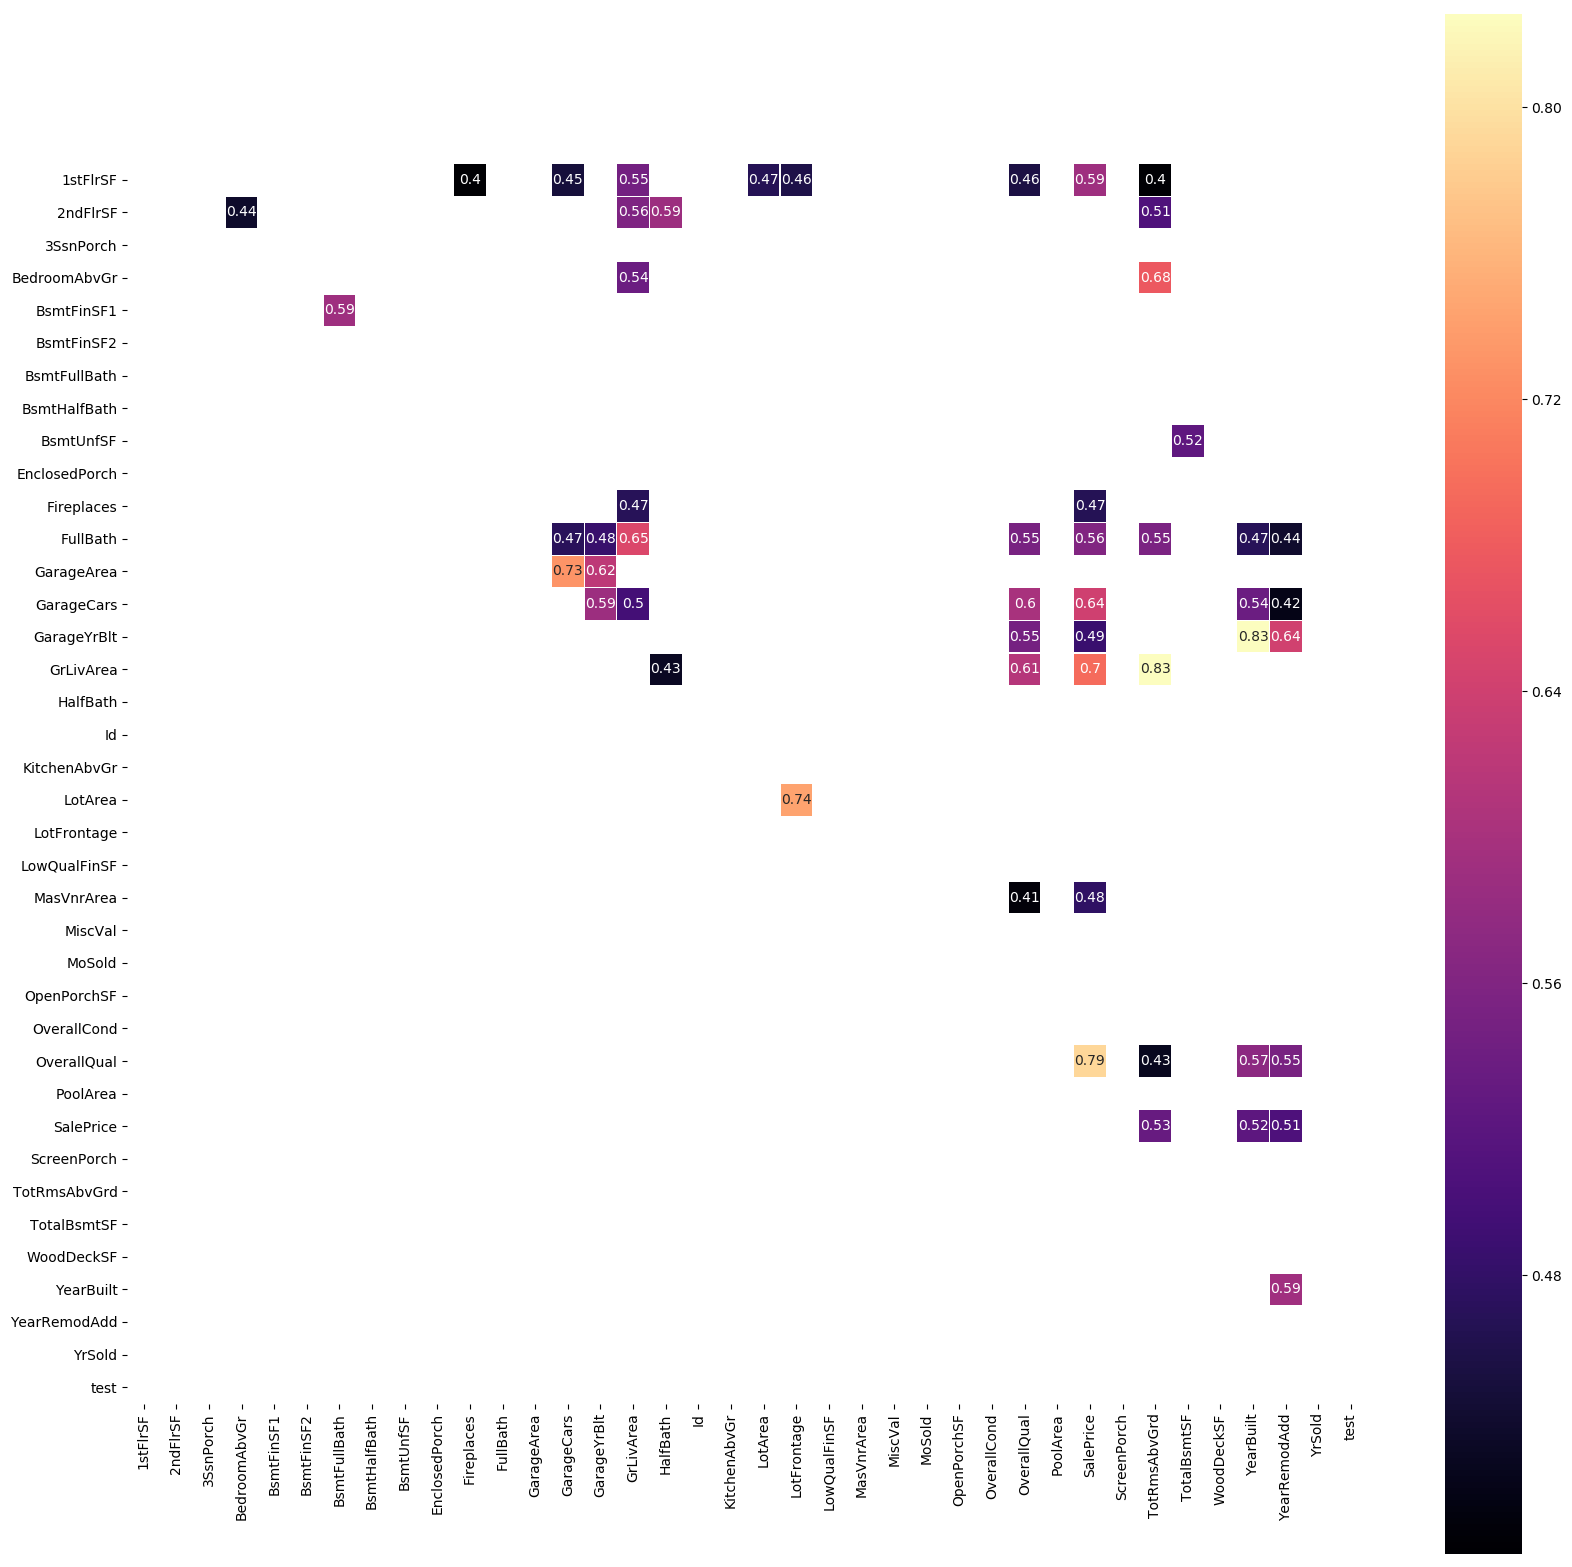

In [65]:
plt.figure(figsize=(20, 20))
img = sns.heatmap(data = corr[(corr >= 0.4) | (corr <= -0.4)],cmap='magma', linewidths=0.1,annot = True, square=True,annot_kws = {"size":10})
plt.savefig('corr.png')

Overall Qual seems to be highly correlated with many variables
    YeatBuilt, YearRemodAdd, TotalBsmtSF, GrKivArea, GarageYrBlt, FullBath, GarageCars, GarageCars
1. BsmtFinSF1: BsmtFullBath, BsmtUnfSF
2. YearBuilt: GarageYrBlt, YearRemodAdd
3. 1stFlrSF: TotalBsmtSF
4. GrLivArea: TotRmsAbvGrd, 2ndFlrSF, FullBath, BedroomAbvGr, 1stFlrSF
5. 2nfFleSF: HalfBath
6. BedroomAbvGr: TotRmsAbvGrd
7. GarageArea: GarageCars

#### We may want to replace many variables with the varibles that are highly correlated with the SalePrice variable

### Plotting linear regression lines on the variables highly correlated with the target variable

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


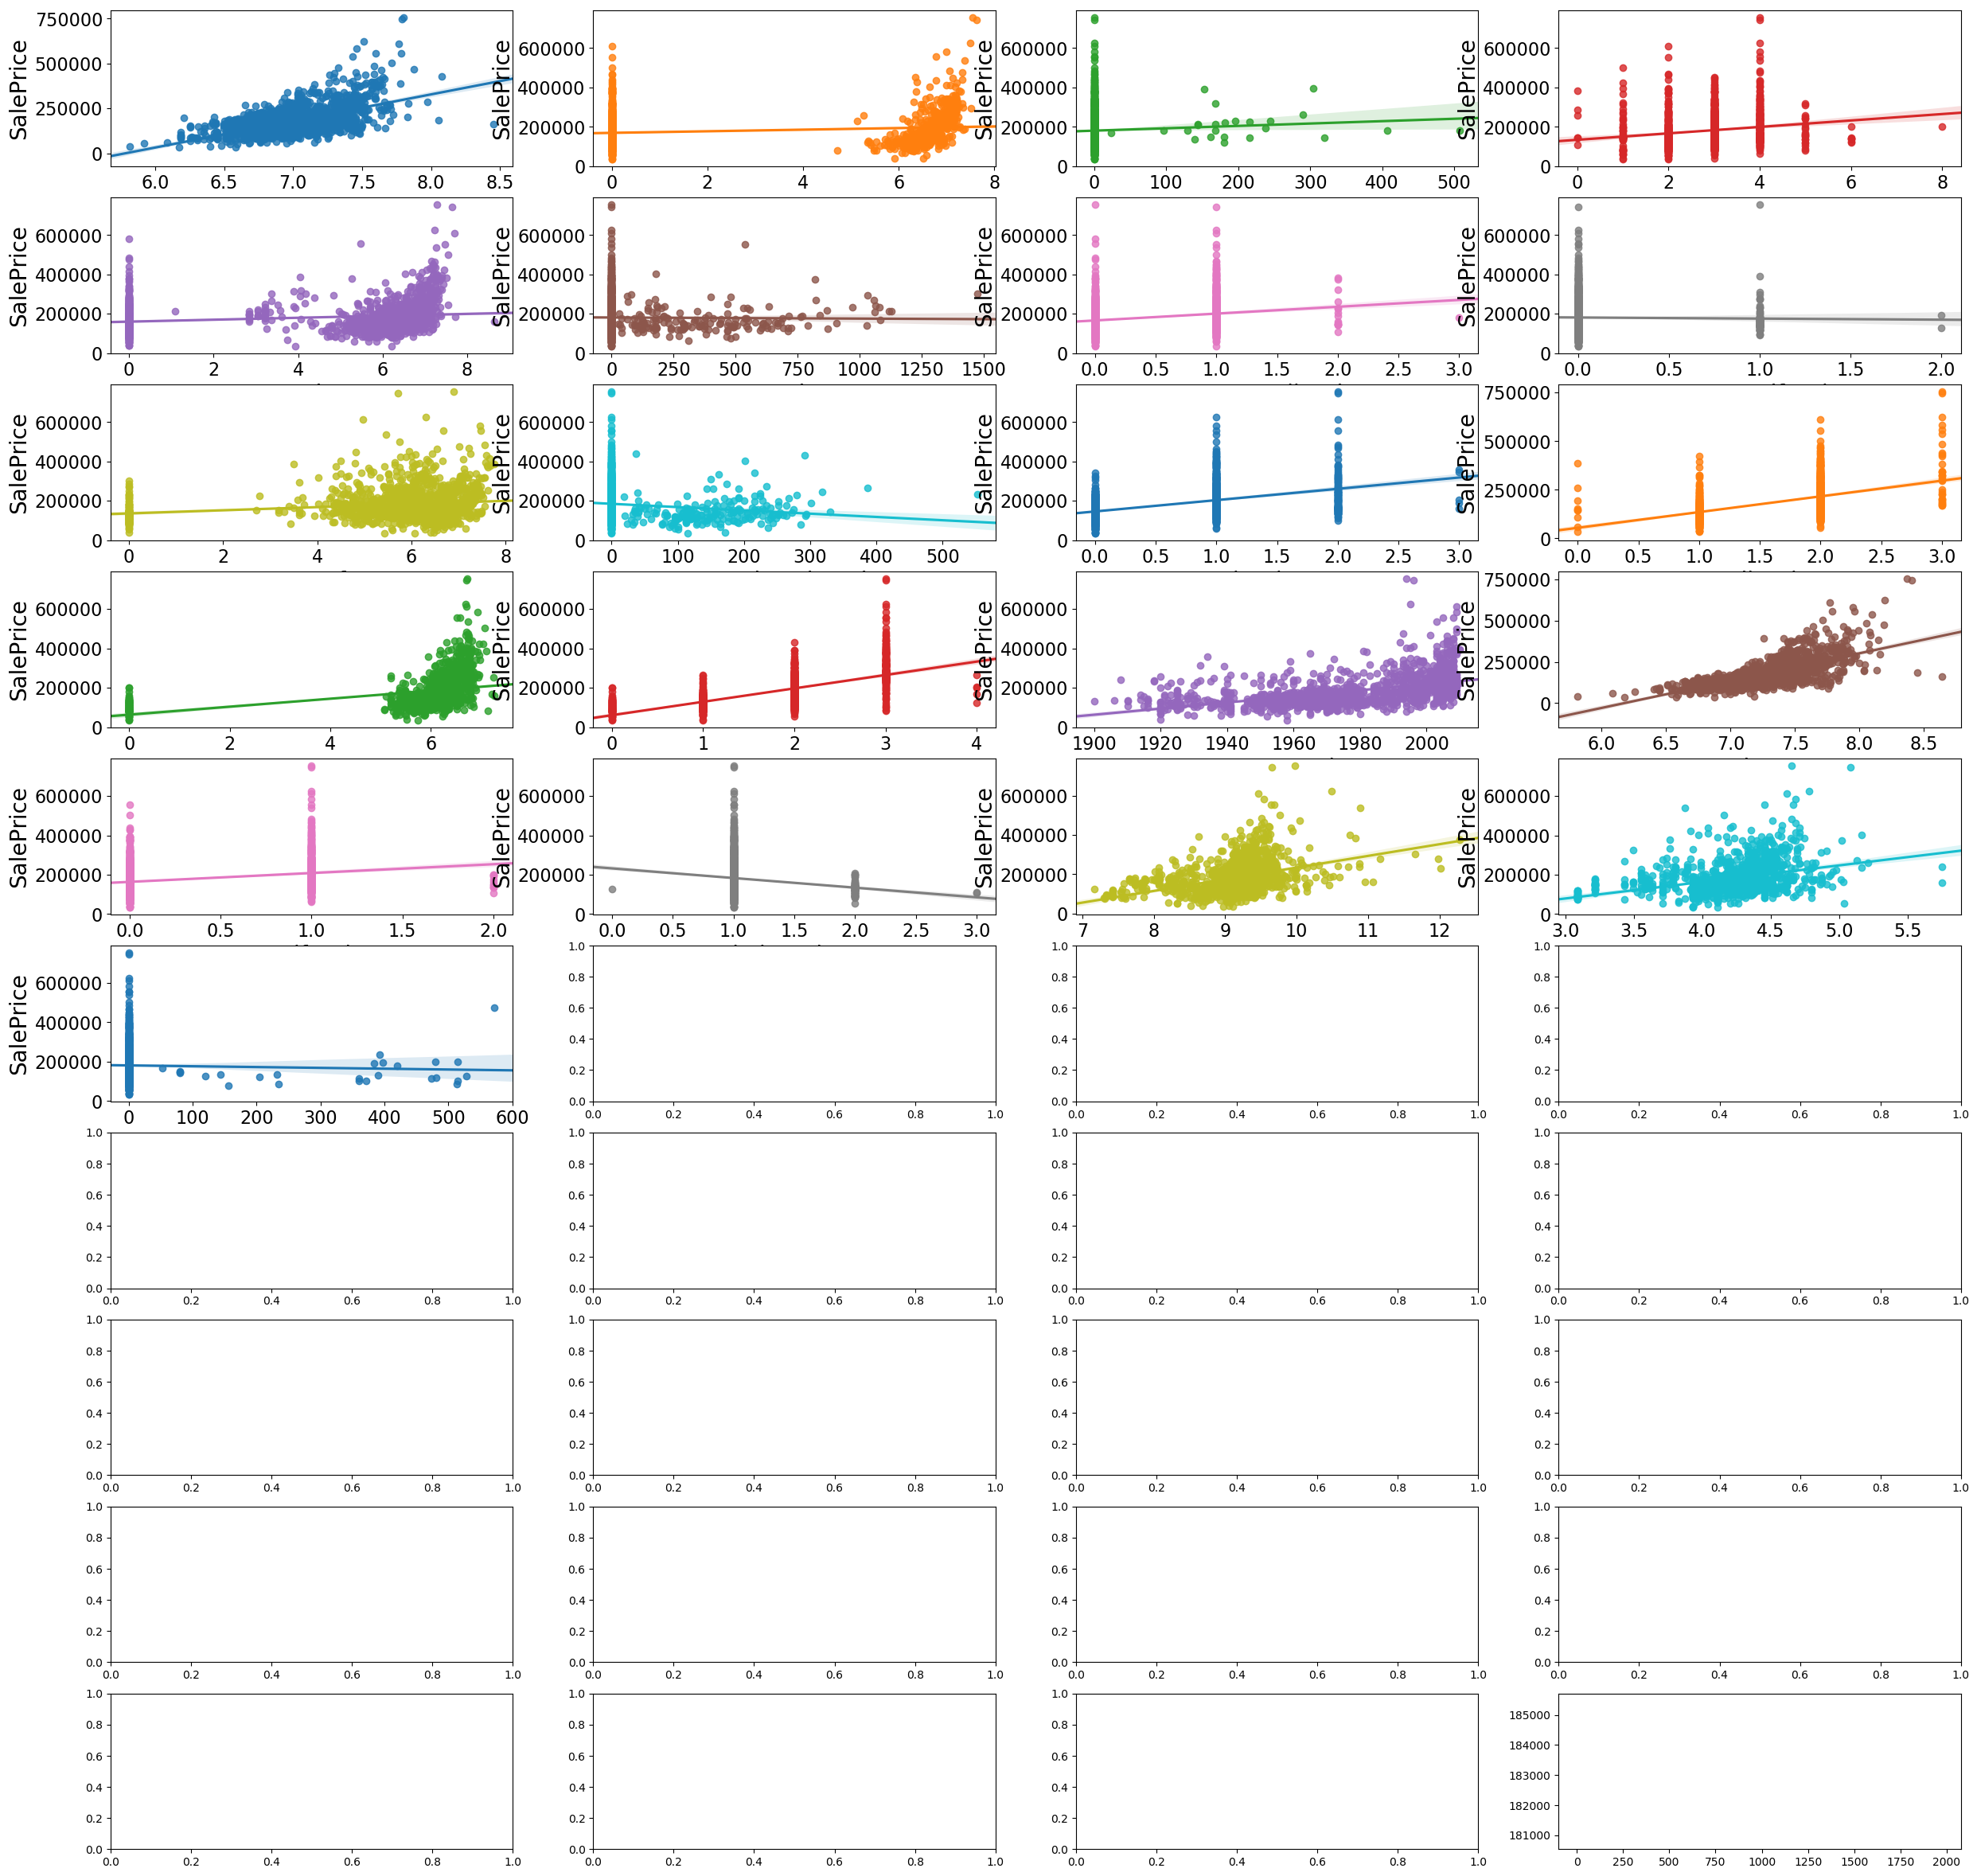

In [66]:
fig, ax = plt.subplots(len(num_cols)//3 + 1, 3, figsize = (30,30))
for i, ax in enumerate(fig.axes):
#for i in range(len(features)):
    #print(features[i])
    if i <len(num_cols):
        sns.regplot(x=num_cols[i], y = 'SalePrice', data = train, ax=ax)
        ax.set_xlabel(num_cols[i], fontsize=20)
        ax.set_ylabel('SalePrice', fontsize=20)
        ax.tick_params(labelsize=16)
        
plt.tight_layout()

## Plotting Categorical variables

In [ ]:
#check if there are any missing values in cat columns
df[cat_cols].isnull().sum()

In [ ]:
df[cat_cols].head(10)

### No missing remain anymore

In [ ]:
fig, ax = plt.subplots(len(cat_cols)//4,4, figsize = (20,20))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols)-1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x= cat_cols[i], data = train, ax=ax, )
        
fig.tight_layout()

BsmtFinType1, Exterior1st, Exterior2nd, GarageFinish, HeatingQC, HouseStyle, Neighbourhood(most variation) are the most important variables

## Treating Outliers after creating base model

In [ ]:
#train[train['1stFlrSF'] >4000]

#this value seems like an outlier, creating noise in the data, let's mark it is as an outlier

#train['outlier'] = 0
#train['outlier'][train['1stFlrSF'] >4000] = 1

In [ ]:
df[df['BsmtFinSF1'] >4000]

In [ ]:
#train['SalePrice'][train['Neighborhood'] == 'Edwards'].hist()
#df['SalePrice'][df['Neighborhood'] == 'Edwards'].hist()

Going by the distribution we will take log of this to make it more normal

In [ ]:
train[train['BedroomAbvGr']==0]

So weird that there are 6 houses with no bedroom above ground, probably outliers

### Imputing more outliers after fisrt iteration so that we can have better accuracy

GarageYrBlt > 2200 (this is wronng needs to be imputed) also, 3 data points with yr built < 190 0

In [ ]:
#joining train and test so that we can remove outliers from train and test
#df = pd.concat([train, test])
df.head()

Removing outlier having 1stFlrSF > 4000

In [ ]:
df.head()

#### GarageYrBlt > 2200

In [ ]:
df[df['GarageYrBlt'] > 2010]

In [ ]:
# changing GarageYrBlt > 2200 to YearBuilt

In [ ]:
df['GarageYrBlt'][df['GarageYrBlt'] > 2010] = df['YearBuilt'][df['GarageYrBlt'] > 2010]

### OverallQual < 1

In [ ]:
df[df['OverallQual'] < 1]

No such datapoint esists

In [ ]:
train.head()

# Part B: Model Fitting (Linear)

#### First we will convert all categorical variables into dummy variables

In [ ]:
#saving df from part A into another df as a back up
#df = df_originalal_from_partA
#df_originalal_from_partA = df

## Dummy data encoder (returns df of dummy data)

In [ ]:
def dummy_encoder(data):
    dummy_data = pd.get_dummies(data)
    return (dummy_data)

## Standardize data functions (returns standardized df)

In [ ]:

# def standardize(data):
#     columns = data.columns
#     index = data.index
#     scaled_data = scaler.fit_transform(data)
#     scaled_data = pd.DataFrame(scaled_data, columns=columns, index=index)
#     return(scaled_data)

## Linear Regression function, takes in (X_train, y_train, X_test), returns (pred, err_train)

In [ ]:
from sklearn.linear_model import LinearRegression as LR
#from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as rmsle

def lreg(X_train, y_train, X_test):
    
    #instance of Linear Regressor
    lr = LR(normalize=True)
    
    #model fitting
    lr.fit(X_train,y_train)
    
    
    #predicting on test data
    pred = lr.predict(X_test)
    pred_train = lr.predict(X_train)
    pred_train[pred_train<0] = 0
    
    
    #rmsle for train
    
    err_train = np.sqrt(rmsle(pred_train,y_train))
    
    
    #print(pred_train[pred_train<0])
    #print(y_train[y_train<0])
    
    
    return(pred, err_train)

### LR Assumptions

In [ ]:
##plt.plot(residuals['actual_values'],residuals['predicted_values'], 'b.', alpha=.6, label = 'actual')
#plt.plot(residuals['actual_values'],residuals['actual_values'], 'r-', label = 'predicted',alpha=.6 )
#sns.scatterplot(x='actual_values', y='predicted_values', data = residuals)
#plt.legend(loc='best')
#plt.title("Actual vs Predicted")
#plt.show()
#plt.ylim(-1, 1)

Some outlier values in the residuals are making it look as if most of the residuals are zero

In [ ]:
#plt.title("Actual vs Residuals")
#sns.scatterplot(x='actual_values', y='residuals', data = residuals)
#plt.ylim(-1, 1)

#### Checking distribution of the residuals

In [ ]:
#sns.distplot(residuals['residuals'], bins = 100)

In [ ]:
#from statsmodels.graphics.gofplots import qqplot
#fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
#qqplot(residuals['residuals'], line = 's' , ax = ax)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
#VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index =df.columns)
#VIF[VIF<4]

In [ ]:
#import numpy as np
#import seaborn as sns
#%matplotlib inline
##value=np.random.randn(500)
#sns.distplot(residuals['residuals'], bins=150)


## Adding features iteratively

Lets add new features based on kaggle discussion

- **age_when_sold** : df['YrSold'] - df['YearBuilt']
- **remodel_age** = YrSold - YearRemodAdd
- **totalSF** : GrLivArea + TotalBsmtSF
- **no_of_bath** =  BsmtFullBath + 0.5*(BsmtHalfBath) + FullBath + 0.5*(HalfBath)
- **total_porch** = OpenPorchSF + EnclosedPorch + ScreenPorch + 3SsnPorch + WoodDeckSF
- **overall_qual_cond** = OverallCond * OverallQual
- **non_bedroom_rooms** = TotRmsAbvGrd - BedroomAbvGr #might suggest reading room, actiities room, etc, boosting the price


In [ ]:
df['age_when_sold'] = df['YrSold'] - df['YearBuilt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']
df['totalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
df['no_of_bath'] = df['BsmtFullBath'] + df['FullBath'] + 0.5*df['BsmtHalfBath'] + 0.5*df['HalfBath']
df['total_porch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['3SsnPorch'] + df['WoodDeckSF']

df['overall_qual_cond'] = df['OverallCond'] *  df['OverallQual']

df['non_bedroom_rooms'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

In [ ]:
df.head()

In [ ]:
train = df[df['test']==0]
test = df[df['test']==1]

In [ ]:
# cat_cols  = list(df.dtypes[df.dtypes == 'object'].index)
# num_cols = list(df.dtypes[df.dtypes != 'object'].index)
# num_cols.remove('SalePrice')



In [ ]:
#num_cols.extend(['age_when_sold', 'remodel_age', 'totalSF', 'no_of_bath', 'total_porch','overall_qual_cond', 'non_bedroom_rooms' ])

## Recursive Feature Elemination (RFE) on numerical columns

In [ ]:
#just taling the numerical feasture for RFE
train[num_cols].drop(['Id', 'test'], axis=1).head()

In [ ]:
standardized_train = standardize(train[num_cols].drop(['Id', 'test'], axis=1))
standardized_train.head()

In [ ]:
from sklearn.feature_selection import RFE
model = LR(normalize=True)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(standardized_train, train['SalePrice'])

In [ ]:
ranking_df = pd.DataFrame()
ranking_df['feature'] = standardized_train.columns
ranking_df['rank'] = rfe.ranking_
ranking_df.sort_values(by=['rank'])

The first 4 variables seem the most important in fact as they have good distribution and also make a lot of sense

totalSF
TotRmsAbvGrd
YearBuilt
remodel_age
no_of_bath
total_porch
overall_qual_cond
GarageCars
PoolArea
LotArea

In [ ]:
# var = """totalSF
# TotRmsAbvGrd
# YearBuilt
# remodel_age
# no_of_bath
# total_porch
# overall_qual_cond
# GarageCars
# PoolArea
# LotArea"""

# var = var.split('\n')
# var

##### Let's make a model with just the above 4 numerical variables

In [ ]:
# type(num_cols)
# num_cols.remove('SalePrice')


In [ ]:
standardized_test = standardize(test[num_cols].drop(['Id', 'test'], axis=1))
standardized_test.head()

In [ ]:
standardized_train.head()

In [ ]:
standardized_test[var].head()

In [ ]:
standardized_train[var].head()

In [ ]:
# pred, err_train = lreg(standardized_train[var], train['SalePrice'], standardized_test[var])
# err_train
# results = pd.DataFrame({'Id':test['Id'], 'SalePrice':pred})
# results.head()

In [ ]:
#results.to_csv('20191020_v1.csv', index=False)

In [ ]:
# x = pd.read_csv('20191020_v1.csv')
# x.head()

#### The above has resulted in improvement in score. Now, let's add some key categorical features as well. Categorical features, that have good distribution

Following cat variabels seem to have good distribution:

BsmtFinType1
Exterior1st
GarageFinish
HouseStyle
Neighbourhood

Before we do that, we may want to reduce the number of categoricals for some variables

#### Neighbourhood

In [ ]:
#temp = df['Neighborhood'].value_counts().sort_values(ascending=False)
temp = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
temp

In [ ]:
d = temp.to_dict()
d

In [ ]:
for k,v in d.items():
    #print(k, v)
    if (v>300000):
        d[k] = 'A'
    elif (v>200000):
        d[k] = 'B'
    elif (v>150000):
        d[k] = 'C'
    else:
        d[k] = 'D'

In [ ]:
d

In [ ]:
df['Neighborhood_Category'] = df['Neighborhood'].map(d)

In [ ]:
# train = df[df['test'] == 0]
# test = df[df['test'] == 1]
df.head()

### HouseStyle

In [ ]:
df['HouseStyle'].value_counts(normalize=True)

HouseStyle has relevant categories for 1Story    2Story      1.5Fin     and rest can be clubbed as others

In [ ]:
df['HouseStyle_Category'] = df['HouseStyle'].apply(lambda x: x if x in ['1Story','2Story','1.5Fin'] else 'Other')

In [ ]:
df.tail()

In [ ]:
train = df[df['test'] == 0]
test = df[df['test'] == 1]

## GarageFinish

In [ ]:
df['GarageFinish'].value_counts(normalize=True)

GarageFinish has manageable numner of categories, we will leave it as it is

## Exterior1st

In [ ]:
df['Exterior1st'].value_counts(normalize=True)
temp = df['Exterior1st'].value_counts(normalize=True)
temp

Majorly four categories, rest can be clubbed as 'others'

In [ ]:
temp.index[:3]

In [ ]:
d= df['Exterior1st'].to_dict()
d

In [ ]:
df['Exterior1st_Category'] = df['Exterior1st'].apply(lambda x: x if x in temp.index[:3] else 'Other')

In [ ]:
df.head()

In [ ]:
train = df[df['test'] == 0]
test = df[df['test'] == 1]

## BsmtFinType1


In [ ]:
temp = df['BsmtFinType1'].value_counts(normalize=True)
temp

Again only 3 major categories, rest can be clubbed as others

In [ ]:
df['BsmtFinType1_Category'] = df['BsmtFinType1'].apply(lambda x: x if x in temp.index[:3] else 'Other')

In [ ]:
df.head()

In [ ]:
train = df[df['test'] == 0]
test = df[df['test'] == 1]

### Let's now dummycode these categorical variables and run linear regression

In [ ]:
cat_features = ['Neighborhood_Category','HouseStyle_Category', 'Exterior1st_Category' , 'BsmtFinType1_Category','GarageFinish' ]

In [ ]:
standardized_train[cat_features] = train[cat_features]
standardized_test[cat_features] = test[cat_features]

In [ ]:
standardized_train.head()

### Dummy encoding for train and test

In [ ]:
standardized_train_dummy = dummy_encoder(standardized_train)
standardized_test_dummy = dummy_encoder(standardized_test)

In [ ]:
standardized_test_dummy.head()

In [ ]:
# pred, err_train = lreg(standardized_train_dummy, train['SalePrice'],standardized_test_dummy )
# err_train

In [ ]:
# results = pd.DataFrame({'Id':test['Id'], 'SalePrice':pred, })
# results.head()

In [ ]:
# results.to_csv('20191022_v1.csv', index=False)

In [ ]:
# x = pd.read_csv('20191022_v1.csv')
# x.head()

# Random Forest

# 1

In [ ]:
num_cols = num_cols + ['age_when_sold',
                       'remodel_age','totalSF',
                       'no_of_bath',
                       'total_porch',
                       'overall_qual_cond',
                       'non_bedroom_rooms']

In [ ]:
num_cols.remove('Id')
num_cols.remove('test')

###### Preparing dataset for random forest
- taking all numerical features
- taking only the select cat features

###### Features

In [ ]:
type(num_cols), type(cat_features)

In [ ]:
features = num_cols + cat_features
#features

In [ ]:
len(features)

###### Train Test

In [ ]:
train = df[df['test'] == 0]
test = df[df['test'] == 1]

#### Label coding cat features

In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

In [ ]:
train[cat_features] = train[cat_features].apply(LE().fit_transform)
test[cat_features] = test[cat_features].apply(LE().fit_transform)

In [ ]:
# train = train.drop(['Id', 'test'], axis=1)
# test = test.drop(['Id', 'test'], axis=1)

In [ ]:
train.head()

##### Creating Random Forest function

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR
model_rfr=RFR(n_estimators='warn',max_depth=None, min_samples_split=2,min_samples_leaf=1, n_jobs=-1)

In [ ]:
def random_forest(X_train,y_train,X_test,
                  n_estimators='warn',
                  max_depth=None, 
                  min_samples_split=2,
                  min_samples_leaf=1, 
                  n_jobs=-1 ):
    
    model_rfr = RFR(n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                n_jobs=n_jobs)
    
    model_rfr.fit(X_train, y_train)
    
    pred_test = model_rfr.predict(X_test)
    
    r2_train = model_rfr.score(X_train, y_train)

    
    return(pred_test, r2_train, model_rfr.feature_importances_)
    

In [ ]:
pred_test, r2_train, feature_importances = random_forest(train[features], train[target], test[features])

In [ ]:
r2_train

In [ ]:
feature_importance = pd.DataFrame({'feature':train[features].columns, 'importance': feature_importances})
feature_importance.sort_values(by='importance', ascending = False)

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred_test})
results.head()

In [ ]:
# results.to_csv('20191024_v5.csv', index=False)

In [ ]:
x = pd.read_csv('20191024_v5.csv')
x.head()

# Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
gbr = GBR()

In [ ]:
gbr.fit(train[features], train[target])

In [ ]:
pred = gbr.predict(test[features])

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred})

In [ ]:
results.head()

In [ ]:
# results.to_csv('20191026_v1.csv', index=False)

In [ ]:
x = pd.read_csv('20191026_v1.csv')
x.head()

# XGBoost

In [ ]:
# !pip install xgboost

In [ ]:
from xgboost import XGBRegressor as XGB

In [ ]:
xgb = XGB()

In [ ]:
xgb.fit(train[features], train[target])

In [ ]:
pred = xgb.predict(test[features])

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred})
results.head()

In [ ]:
results.to_csv('20191027_v2.csv', index=False)

In [ ]:
x = pd.read_csv('20191027_v2.csv')
x.head()

In [ ]:
train[features], train[target], test[features]

# AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor as AB

In [ ]:
ab = AB(base_estimator = RFR())

In [ ]:
ab.fit(train[features], train[target])

In [ ]:
pred = ab.predict(test[features])

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred})
results.head()

In [ ]:
# results.to_csv('20191027_v3.csv', index=False)

# STACKING

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from mlxtend.regressor import StackingCVRegressor as SR

In [ ]:
# !pip install mlxtend

In [ ]:
stacked_model = SR(regressors=[gbr, model_rfr], meta_regressor= Ridge())

In [ ]:
stacked_model.fit(train[features], train[target])

In [ ]:
pred = stacked_model.predict(test[features])

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred})
results.head()

In [ ]:
# results.to_csv('20191028_v1.csv', index=False)

# Random Search on GBM

In [ ]:
gbr = GBR()

In [ ]:
para =  {'n_estimators':[5,10,20,40,60,80,100,150],
         'min_samples_split':[2,5,10,20,30,40,50,70,90,120,150],
         'max_depth':[3,4,5,6,8,10,20]}
         
         

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [ ]:
rs = RS(estimator=gbr,
       param_distributions=para,
       n_iter=100,
       cv=5)

In [ ]:
rs.fit(train[features], train[target])

In [ ]:
rs.best_params_

In [ ]:
gbr = GBR(n_estimators=100, min_samples_split=40, max_depth=4)

In [ ]:
gbr.fit(train[features], train[target])

In [ ]:
pred = gbr.predict(test[features])

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred})
results.head()

In [ ]:
results.to_csv('20191028_v2.csv', index=False)

# Hyperparameter tuning using random search for XGBoost

In [ ]:
model = XGB()

In [ ]:
para =  {'n_estimators':[5,10,20,40,60,80,100,150],
         'reg_alpha':[0.1,0.2,0.01,0.05,0.4],
         'max_depth':[3,4,5,6,8,10,20],
         'n_jobs':[-1],}

In [ ]:
rs = RS(estimator=model,
       param_distributions=para,
       n_iter=30,
       cv=5)

In [ ]:
rs.fit(train[features], train[target])

In [ ]:
rs.best_params_

In [ ]:
model = XGB(reg_alpha= 0.2, n_jobs= -1, n_estimators=100, max_depth= 3)

In [ ]:
model.fit(train[features], train[target])

In [ ]:
model.predict(test[features])

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred})
results.head()

In [ ]:
results.to_csv('20191028_v3.csv', index=False)

# Using PCA to reduce dimensionality of numeric data

In [ ]:
#features = num_cols + cat_features
df[features].head()

In [ ]:
type(train_x_num)


# 1

In [ ]:
train_x_num = df.loc[df['test'] == 0,num_cols]
test_x_num = df.loc[df['test'] == 1,num_cols]
train_y = df.loc[df['test']==0, 'SalePrice']

# 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x_num.values)
train_x_num_scaled = scaler.transform(train_x_num.values)
test_x_num_scaled = scaler.transform(test_x_num.values)

train_x_num_scaled = pd.DataFrame(train_x_num_scaled, columns=train_x_num.columns)
test_x_num_scaled = pd.DataFrame(test_x_num_scaled, columns=test_x_num.columns)

In [ ]:
train_x_num.head()

In [ ]:
test_x_num.head()

In [ ]:
train_x_num_scaled.head()

In [ ]:
test_x_num_scaled.head()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(train_x_num_scaled)

In [ ]:
len(np.cumsum(pca.explained_variance_ratio_)[np.cumsum(pca.explained_variance_ratio_) < .95])

In [ ]:
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)')
# plt.title('MNIST - Explained Variance')

# # We want to preserve 95% of the variance so plot a horizontal line at 95% variance
# plt.axhline(y=95, color='r', linestyle='--')
# plt.show()

In [ ]:
pca = PCA(43).fit(train_x_num_scaled)

In [ ]:
x_train_scaled_num_tranmsformed = pca.transform(train_x_num_scaled)
x_test_scaled_num_tranmsformed = pca.transform(test_x_num_scaled)

x_train_scaled_num_tranmsformed = pd.DataFrame(x_train_scaled_num_tranmsformed)
x_test_scaled_num_tranmsformed = pd.DataFrame(x_test_scaled_num_tranmsformed)

### Now appending cat_features after label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

In [ ]:
df[cat_features].head()

In [ ]:
df_cat = df[cat_features].apply(LE().fit_transform)

In [ ]:
# df_cat.index.equals(df.index)

In [ ]:
df_cat['test'] = df['test']

In [ ]:
x_train_scaled_num_tranmsformed.shape

In [ ]:
df_cat.loc[df_cat['test']==0,cat_features].shape

In [ ]:
x_train_scaled_num_tranmsformed.index.equals(df_cat.loc[df_cat['test']==0,cat_features].index)

In [ ]:
x_train = pd.concat([x_train_scaled_num_tranmsformed,df_cat.loc[df_cat['test']==0,cat_features]], axis=1,ignore_index=True)

In [ ]:
x_train.tail()

In [ ]:
x_test = pd.concat([x_test_scaled_num_tranmsformed,df_cat.loc[df_cat['test']==1,cat_features]], axis=1,ignore_index=True)

In [ ]:
x_test.head()

In [ ]:
train_y.shape

#### XGboost after PCA

In [ ]:
from xgboost import XGBRegressor

In [ ]:
reg = XGBRegressor()

In [ ]:
reg.fit(x_train, train_y)

In [ ]:
pred = reg.predict(x_test)

In [ ]:
results = pd.DataFrame({'Id':test['Id'], 'SalePrice': pred})
results.head()

In [ ]:
results.to_csv('20191028_v3.csv', index=False)